# Import libraries and data

In this section, we import the necessary libraries and load the data. We will also create a lookup table that stores the relationship between the material, sample number, and the file path to the corresponding CSV file.


In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Specify the parent directory
parent_directory = os.path.expanduser("data_fix")

# Create a lookup table (DataFrame) to store the relationship between the material, sample number, and file path
lookup_table = pd.DataFrame(columns=['Material', 'Sample_Number', 'File_Path'])

#define constant dimensions of the sample
sample_length = 8 #mm
sample_width = 3 #mm

# Iterate over each material folder in the parent directory
for material_folder in os.listdir(parent_directory):
    material = material_folder.lower()  # Convert to lowercase
    material_path = os.path.join(parent_directory, material_folder)

    # Check if the path is a directory
    if os.path.isdir(material_path):
        # Iterate over each sample folder in the material folder
        for sample_folder in os.listdir(material_path):
            sample_number = sample_folder.replace('Ecoflex', '').lower()  # Convert to lowercase
            sample_path = os.path.join(material_path, sample_folder)

            # Find the CSV file in the sample folder
            for file in os.listdir(sample_path):
                if file.endswith(".csv") and "Data" in file:
                    file_path = os.path.join(sample_path, file)
                    # Append the information to the lookup table
                    row_df = pd.DataFrame([{'Material': material, 'Sample_Number': sample_number, 'File_Path': file_path}])
                    lookup_table = pd.concat([lookup_table, row_df], ignore_index=True)

lookup_table


,Material,Sample_Number,File_Path
0,dra-eco,238,data_fix\Dra-Eco\Ecoflex238\Ecoflex238Data.csv
1,dra-eco,239,data_fix\Dra-Eco\Ecoflex239\Ecoflex239Data.csv
2,dra-eco,240,data_fix\Dra-Eco\Ecoflex240\Ecoflex240Data.csv
3,dra-eco,241,data_fix\Dra-Eco\Ecoflex241\Ecoflex241Data.csv
4,dra-eco,242,data_fix\Dra-Eco\Ecoflex242\Ecoflex242Data.csv
...,...,...,...
162,soma-gel,177,data_fix\Soma-Gel\Ecoflex177\Ecoflex177Data.csv
163,soma-gel,178,data_fix\Soma-Gel\Ecoflex178\Ecoflex178Data.csv
164,soma-gel,179,data_fix\Soma-Gel\Ecoflex179\Ecoflex179Data.csv
165,soma-gel,180,data_fix\Soma-Gel\Ecoflex180\Ecoflex180Data.csv


In [17]:
!pip install openpyxl
import pandas as pd
import numpy as np
import os


# Specify the parent directory and Excel file path
parent_directory = os.path.expanduser("data")
xlsx_file_path = os.path.join(parent_directory, "Thickness of Silicone Dog Bone Samples.xlsx")

# Read the Excel file into a pandas DataFrame
thickness_df = pd.read_excel(xlsx_file_path, header=None)

# Initialize a dictionary to hold DataFrames for each material
material_dfs = {}

# Initialize a variable to hold the current material
current_material = None

# Initialize an empty DataFrame to hold the sample data for the current material
current_df = pd.DataFrame()

# Iterate over the DataFrame
for _, row in thickness_df.iterrows():
    # Check if the current row represents a material header
    if pd.isna(row[1]) and isinstance(row[0], str):
        # If this is not the first material, add the previous DataFrame to the dictionary
        if not current_df.empty:
            material_dfs[current_material] = current_df

        # Update the current material and initialize a new DataFrame
        current_material = row[0].lower()  # Convert to lowercase
        current_df = pd.DataFrame(columns=['Sample', 'Thickness'])

    # Check if the current row represents sample data
    elif isinstance(row[0], str) and not pd.isna(row[1]):
        # Extract the sample number and thickness
        sample_number = row[0].split('-')[0].replace('Ecoflex', '').zfill(3)
        thickness = row[1]

        # Append the data to the current DataFrame
        current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)

# Don't forget to add the last material's DataFrame to the dictionary
if not current_df.empty:
    material_dfs[current_material] = current_df

# Concatenate the DataFrames in the dictionary into a single DataFrame
thickness_df = pd.concat(material_dfs, names=['Material', 'Index'])

# Reset the index
thickness_df.reset_index(level=0, inplace=True)

# Now, thickness_df should be in the desired format
thickness_df


C:\Users\trevo\AppData\Local\Temp\ipykernel_11944\578354129.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)
C:\Users\trevo\AppData\Local\Temp\ipykernel_11944\578354129.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  current_df = pd.concat([current_df, pd.DataFrame({'Sample': [sample_number], 'Thickness': [thickness]})], ignore_index=True)
C:\Users\trevo\AppData\L

,Material,Sample,Thickness
Index,,,
0,dra-sil,076,2.90
1,dra-sil,077,2.85
2,dra-sil,078,2.80
3,dra-sil,079,2.86
4,dra-sil,080,2.80
...,...,...,...
1,pure dragonskin,244,3.03
2,pure dragonskin,245,2.99
3,pure dragonskin,246,2.94


# Function: get_sample_info

The function get_sample_info is designed to retrieve and display information about a specific sample based on its sample number.
Parameters

The function takes two parameters:

    sample_number: The sample number as a string. For example, '001'.
    lookup_table: A pandas DataFrame that serves as a lookup table mapping material names to sample numbers and file paths.

## Process

The function begins by filtering the lookup table for the specific sample number. If no data is found for the given sample number, the function prints a message indicating this and returns None.

If data is found for the sample number, the function retrieves the material name and file path associated with the sample. It then reads the data from the file path into a DataFrame, stripping any leading or trailing spaces from the column names.
Output

The function prints the material group that the sample number belongs to and the DataFrame for this sample. It then returns the material name and DataFrame. If no data is found for the given sample number, the function returns None.
Example Usage


>get_sample_info('001', lookup_table)

This function call will print the material group that sample number '001' belongs to, display the DataFrame for this sample, and return the material name and DataFrame.

In [18]:
def get_sample_info(sample_number, lookup_table):
    # Filter the lookup table for the specific sample number
    sample_data = lookup_table[lookup_table['Sample_Number'] == sample_number]

    if len(sample_data) == 0:
        print(f"No data found for sample number {sample_number}.")
        return None

    material = sample_data['Material'].iloc[0]
    file_path = sample_data['File_Path'].iloc[0]

    df = pd.read_csv(file_path)  # Read in the data
    df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

    print(f"Sample number {sample_number} belongs to the material group: {material}")
    print("Here's the DataFrame for this sample:")
    print(df)

    return material, df

get_sample_info('134', lookup_table)



Sample number 134 belongs to the material group: pure gel
Here's the DataFrame for this sample:
                  SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
0   Elongation till break  1-Stretch    2.61   53.213            0.000   
1   Elongation till break  1-Stretch    2.81   53.694            0.481   
2   Elongation till break  1-Stretch    3.01   54.175            0.962   
3   Elongation till break  1-Stretch    3.21   54.657            1.444   
4   Elongation till break  1-Stretch    3.41   55.138            1.925   
5   Elongation till break  1-Stretch    3.61   55.619            2.406   
6   Elongation till break  1-Stretch    3.81   56.101            2.888   
7   Elongation till break  1-Stretch    4.01   56.582            3.369   
8   Elongation till break  1-Stretch    4.21   57.063            3.850   
9   Elongation till break  1-Stretch    4.41   57.544            4.331   
10  Elongation till break  1-Stretch    4.61   58.025            4.812   
11  Elongation t

('pure gel',
                   SetName      Cycle  Time_S  Size_mm  Displacement_mm  \
 0   Elongation till break  1-Stretch    2.61   53.213            0.000   
 1   Elongation till break  1-Stretch    2.81   53.694            0.481   
 2   Elongation till break  1-Stretch    3.01   54.175            0.962   
 3   Elongation till break  1-Stretch    3.21   54.657            1.444   
 4   Elongation till break  1-Stretch    3.41   55.138            1.925   
 5   Elongation till break  1-Stretch    3.61   55.619            2.406   
 6   Elongation till break  1-Stretch    3.81   56.101            2.888   
 7   Elongation till break  1-Stretch    4.01   56.582            3.369   
 8   Elongation till break  1-Stretch    4.21   57.063            3.850   
 9   Elongation till break  1-Stretch    4.41   57.544            4.331   
 10  Elongation till break  1-Stretch    4.61   58.025            4.812   
 11  Elongation till break  1-Stretch    4.81   58.506            5.293   
 12  Elongat

# Process data based on sample number

In this section, we define a function that processes and plots the dataframes for a given material. The function reads in the data for each sample, appends the dataframe to the appropriate group in the groups dictionary, and plots the results.


In [19]:
gel_eco_thickness_data = thickness_df[thickness_df['Material'] == 'gel-eco']
print(gel_eco_thickness_data)


      Material Sample  Thickness
Index                           
0      gel-eco   125        2.68
1      gel-eco   126        2.56
2      gel-eco   127        2.73
3      gel-eco   128        2.57
4      gel-eco   129        2.60


In [20]:
def process_and_plot_dataframes(material, lookup_table, thickness_df):
    material_data = lookup_table[lookup_table['Material'] == material]
    thickness_df['Sample'] = thickness_df['Sample'].str.strip()

    fig_force_displacement = plt.figure(figsize=(10, 7))
    ax_force_displacement = fig_force_displacement.add_subplot(111)

    youngs_modulus_list = []
    max_stress_list = []
    max_strain_list = []
    sample_data = {}  # This will store stress and strain for each sample

    for _, row in material_data.iterrows():
        sample_number = row['Sample_Number']
        sample_number_str = str(sample_number).zfill(3) 
        file_path = row['File_Path']

        sample_thickness = thickness_df[(thickness_df['Material'] == material) & 
                                        (thickness_df['Sample'] == sample_number_str)]['Thickness'].values[0]

        df = pd.read_csv(file_path)  
        df.columns = df.columns.str.strip()

        df['Force_N'] = df['Force_N'] * 0.319
        df['Displacement_mm'] = df['Displacement_mm'] * 3.133

        df["Stress (MPa)"] = df["Force_N"] / (sample_thickness * sample_width)
        df["Strain"] = (sample_length + df["Displacement_mm"]) / sample_length

        stress = df["Stress (MPa)"].values
        strain = df["Strain"].values

        sample_data[sample_number_str] = {"stress": stress, "strain": strain}

        max_stress_index = df['Stress (MPa)'].idxmax()
        max_stress = df['Stress (MPa)'].max()
        max_stress_list.append(max_stress)
        strain_at_max_stress = df['Strain'][max_stress_index]
        max_strain_list.append(strain_at_max_stress)
        strain_at_50_percent_stress = strain_at_max_stress / 2
        index_at_50_percent_stress = df['Strain'].sub(strain_at_50_percent_stress).abs().idxmin()
        stress_at_50_percent_stress = df['Stress (MPa)'][index_at_50_percent_stress]
        youngs_modulus = (max_stress - stress_at_50_percent_stress) / (strain_at_max_stress - strain_at_50_percent_stress)
        youngs_modulus_list.append(youngs_modulus)

        #truncate values after the fracture point (after global max stress)
        stress = stress[:max_stress_index]
        strain = strain[:max_stress_index]
        

        print(f"The Young's Modulus for sample number {sample_number} is {youngs_modulus} MPa")

        ax_force_displacement.plot(strain, stress, label=sample_number)

    ax_force_displacement.set_xlabel('Strain')
    ax_force_displacement.set_ylabel('Stress (MPa)')
    ax_force_displacement.set_title(f'Stress vs Strain for {material}')
    ax_force_displacement.legend()

    plt.show()

    youngs_modulus_mean = np.mean(youngs_modulus_list)
    youngs_modulus_std = np.std(youngs_modulus_list)
    max_stress_mean = np.mean(max_stress_list)
    max_strain_mean = np.mean(max_strain_list)
    print(f"The mean Young's Modulus for material {material} is {youngs_modulus_mean} MPa")
    print(f"The standard deviation of Young's Modulus for material {material} is {youngs_modulus_std} MPa")
    print(f"The mean max stress for material {material} is {max_stress_mean} MPa")
    print(f"The mean max strain for material {material} is {max_strain_mean}")

    return sample_data, youngs_modulus_mean, youngs_modulus_std


The Young's Modulus for sample number 142 is 0.12069629869493377 MPa
The Young's Modulus for sample number 143 is 0.12506080281182738 MPa
The Young's Modulus for sample number 144 is 0.140510841828379 MPa
The Young's Modulus for sample number 145 is 0.135097138941588 MPa
The Young's Modulus for sample number 146 is 0.13349465093506444 MPa


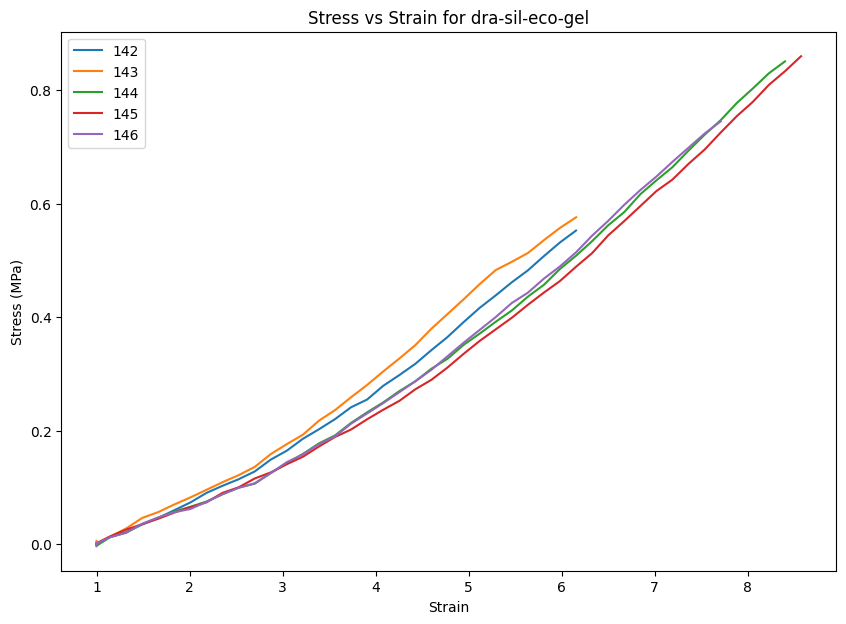

The mean Young's Modulus for material dra-sil-eco-gel is 0.1309719466423585 MPa
The standard deviation of Young's Modulus for material dra-sil-eco-gel is 0.007140060671291031 MPa
The mean max stress for material dra-sil-eco-gel is 0.7295983134088317 MPa
The mean max strain for material dra-sil-eco-gel is 7.571702475
The Young's Modulus for sample number 153 is 0.11835171170179633 MPa
The Young's Modulus for sample number 154 is 0.16974053400946004 MPa
The Young's Modulus for sample number 155 is 0.10985047874914661 MPa
The Young's Modulus for sample number 156 is 0.13136207100461397 MPa
The Young's Modulus for sample number 157 is 0.16301617239991914 MPa
The Young's Modulus for sample number 158 is 0.13066419467144524 MPa


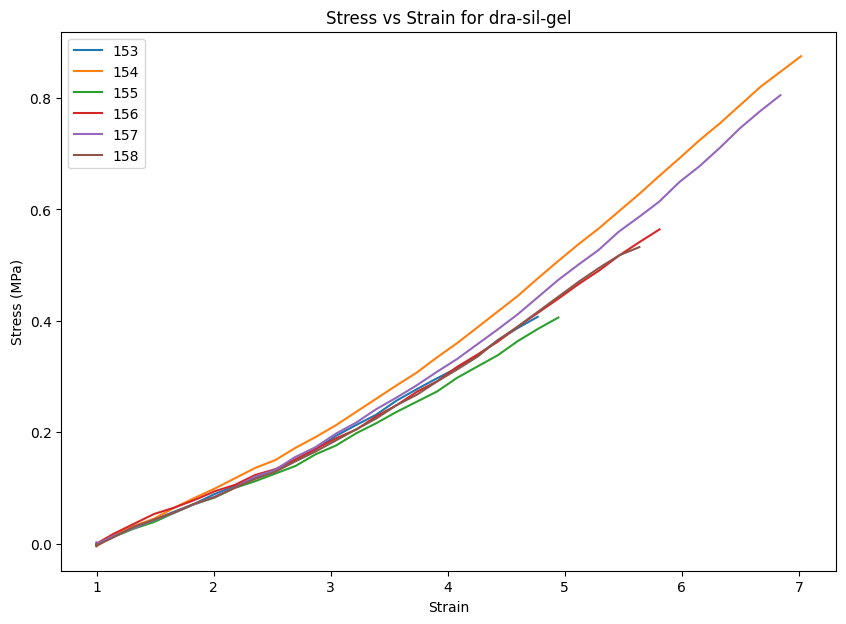

The mean Young's Modulus for material dra-sil-gel is 0.13716419375606356 MPa
The standard deviation of Young's Modulus for material dra-sil-gel is 0.022005324617584265 MPa
The mean max stress for material dra-sil-gel is 0.6145908651669796 MPa
The mean max strain for material dra-sil-gel is 6.009928083333334
The Young's Modulus for sample number 170 is 0.06160196804903357 MPa
The Young's Modulus for sample number 171 is 0.06350223142945995 MPa
The Young's Modulus for sample number 172 is 0.06972911468084965 MPa
The Young's Modulus for sample number 173 is 0.06594223990516984 MPa
The Young's Modulus for sample number 174 is 0.07512797624354813 MPa
The Young's Modulus for sample number 175 is 0.06537412609984397 MPa


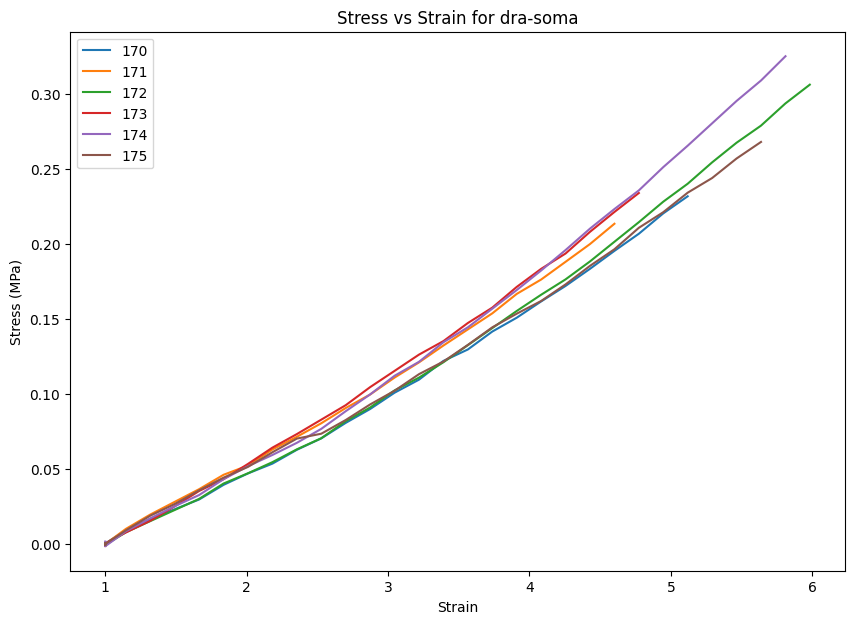

The mean Young's Modulus for material dra-soma is 0.06687960940131753 MPa
The standard deviation of Young's Modulus for material dra-soma is 0.004445232608340854 MPa
The mean max stress for material dra-soma is 0.2747940989418203 MPa
The mean max strain for material dra-soma is 5.4931136249999994
The Young's Modulus for sample number 238 is 0.20104883269448734 MPa
The Young's Modulus for sample number 239 is 0.21368269084860766 MPa
The Young's Modulus for sample number 240 is 0.17187229015357988 MPa
The Young's Modulus for sample number 241 is 0.198778642247765 MPa
The Young's Modulus for sample number 242 is 0.22374541082082655 MPa


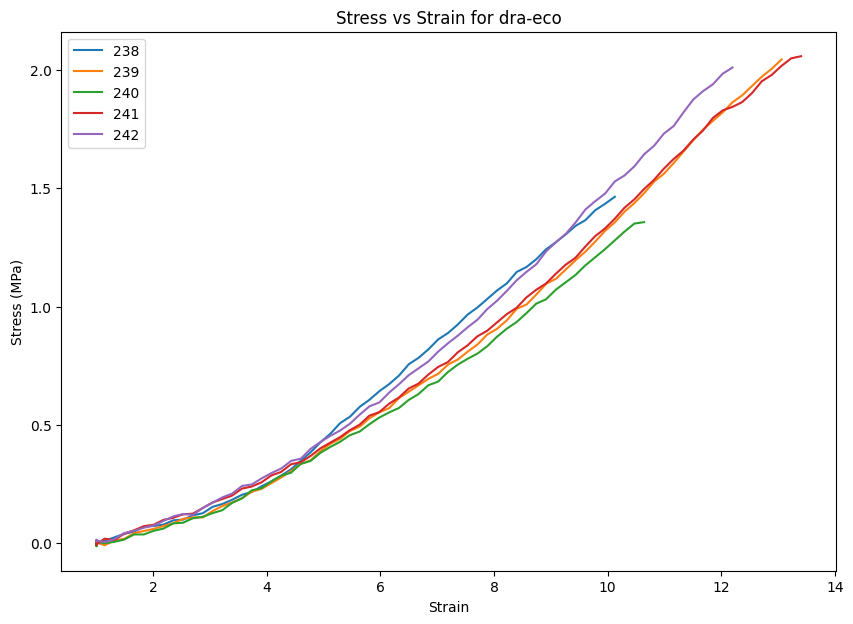

The mean Young's Modulus for material dra-eco is 0.20182557335305332 MPa
The standard deviation of Young's Modulus for material dra-eco is 0.017482315633553108 MPa
The mean max stress for material dra-eco is 1.809369014633901 MPa
The mean max strain for material dra-eco is 12.060743200000001
The Young's Modulus for sample number 120 is 0.03708927808699689 MPa
The Young's Modulus for sample number 121 is 0.027692744147684953 MPa
The Young's Modulus for sample number 122 is 0.0296179762236612 MPa
The Young's Modulus for sample number 123 is 0.03519953852191222 MPa
The Young's Modulus for sample number 124 is 0.031995443233172244 MPa


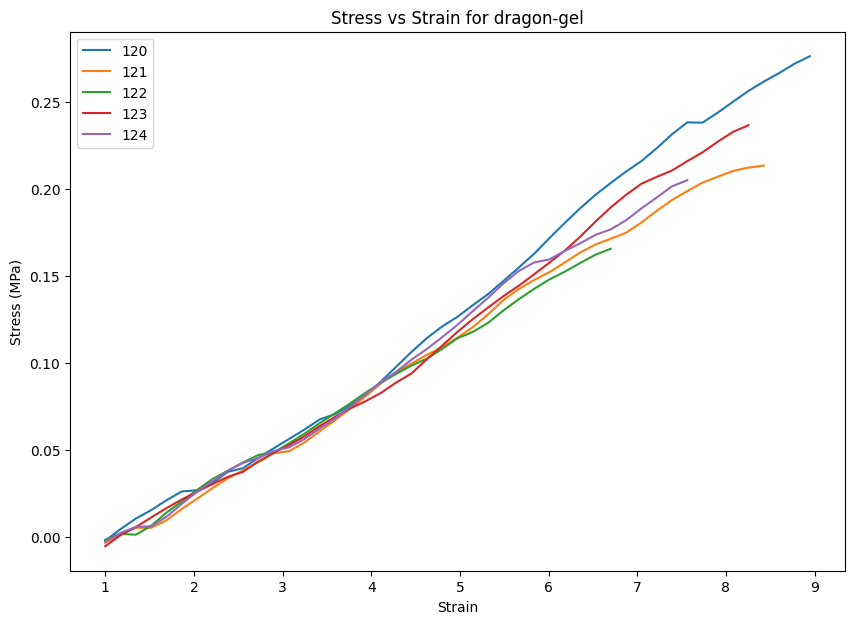

The mean Young's Modulus for material dragon-gel is 0.032318996042685504 MPa
The standard deviation of Young's Modulus for material dragon-gel is 0.0034599282315161224 MPa
The mean max stress for material dragon-gel is 0.22136251280265412 MPa
The mean max strain for material dragon-gel is 8.151934075
The Young's Modulus for sample number 135 is 0.1695402793224765 MPa
The Young's Modulus for sample number 136 is 0.1502371299289617 MPa
The Young's Modulus for sample number 137 is 0.11811469268045126 MPa
The Young's Modulus for sample number 138 is 0.15392008602813045 MPa
The Young's Modulus for sample number 139 is 0.16575639314925947 MPa


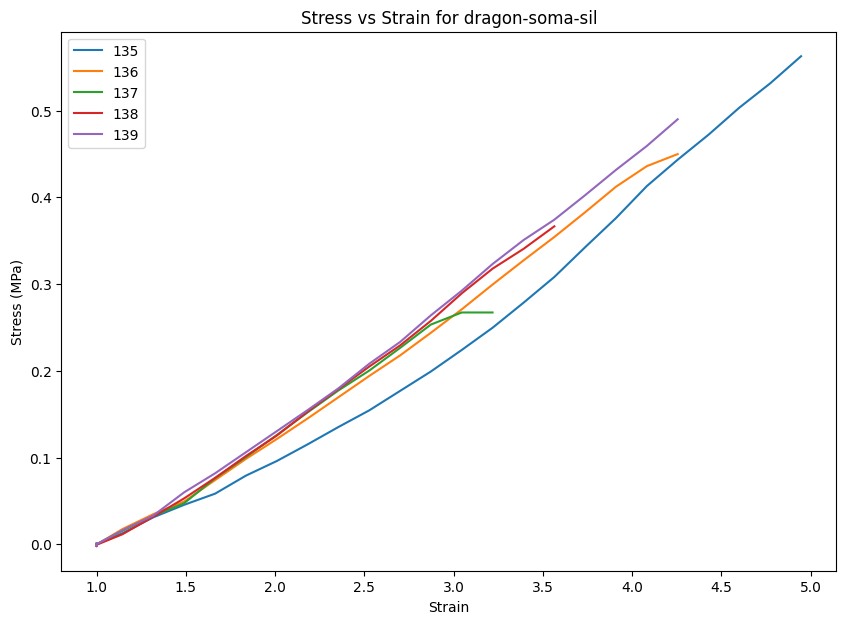

The mean Young's Modulus for material dragon-soma-sil is 0.1515137162218559 MPa
The standard deviation of Young's Modulus for material dragon-soma-sil is 0.01816989755065288 MPa
The mean max stress for material dragon-soma-sil is 0.45065828434372274 MPa
The mean max strain for material dragon-soma-sil is 4.220489025
The Young's Modulus for sample number 159 is 0.10355101933377542 MPa
The Young's Modulus for sample number 160 is 0.08526274352197621 MPa
The Young's Modulus for sample number 161 is 0.09582771161640338 MPa
The Young's Modulus for sample number 162 is 0.07939581182552358 MPa
The Young's Modulus for sample number 163 is 0.09069949551241425 MPa


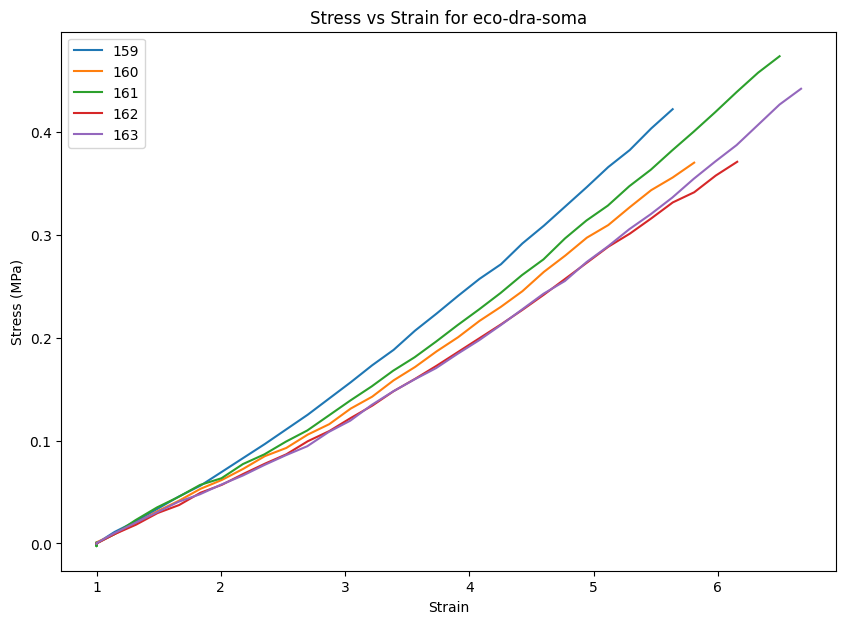

The mean Young's Modulus for material eco-dra-soma is 0.09094735636201857 MPa
The standard deviation of Young's Modulus for material eco-dra-soma is 0.00834846844678956 MPa
The mean max stress for material eco-dra-soma is 0.43179566386279433 MPa
The mean max strain for material eco-dra-soma is 6.3264133
The Young's Modulus for sample number 108 is 0.044806162290510286 MPa
The Young's Modulus for sample number 109 is 0.05647138226718989 MPa
The Young's Modulus for sample number 110 is 0.06423689671796004 MPa
The Young's Modulus for sample number 111 is 0.043720716519703474 MPa
The Young's Modulus for sample number 112 is 0.056621477354338215 MPa
The Young's Modulus for sample number 113 is 0.05300466039039025 MPa
The Young's Modulus for sample number 114 is 0.061838071060046865 MPa


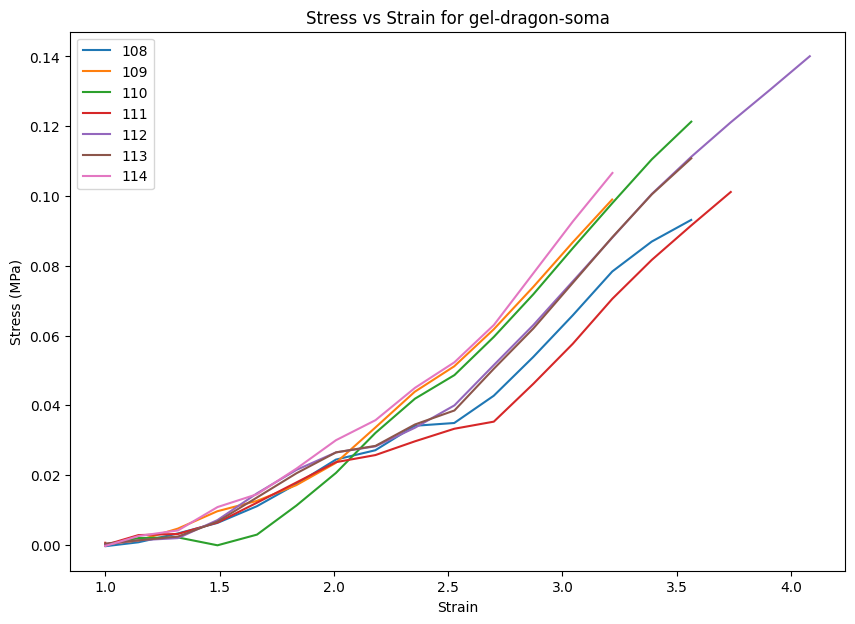

The mean Young's Modulus for material gel-dragon-soma is 0.054385623800019864 MPa
The standard deviation of Young's Modulus for material gel-dragon-soma is 0.007263896709220902 MPa
The mean max stress for material gel-dragon-soma is 0.11964700554935546 MPa
The mean max strain for material gel-dragon-soma is 3.7367314464285712
The Young's Modulus for sample number 125 is 0.02432831108456502 MPa
The Young's Modulus for sample number 126 is 0.02926678909145307 MPa
The Young's Modulus for sample number 127 is 0.02235282562523413 MPa
The Young's Modulus for sample number 128 is 0.026162545568449283 MPa
The Young's Modulus for sample number 129 is 0.02962425564018714 MPa


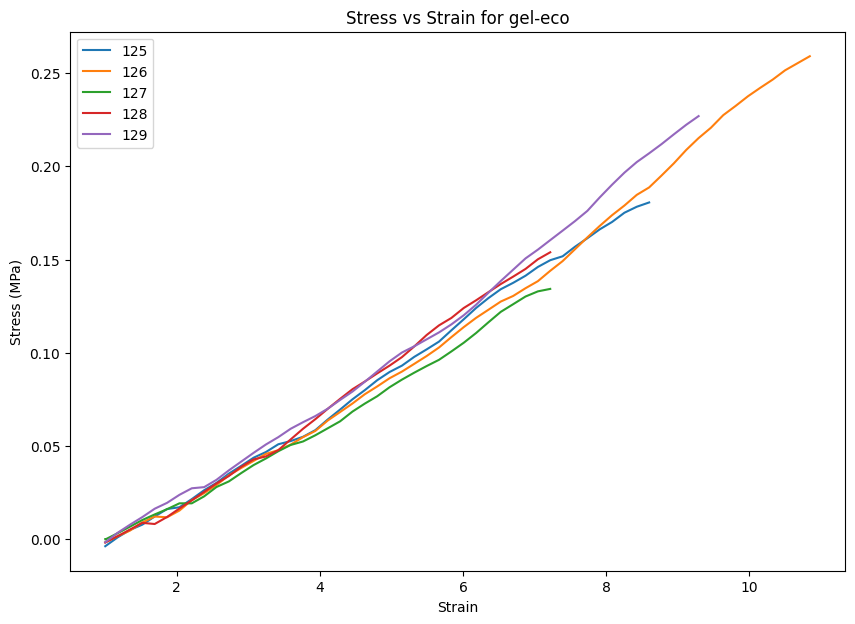

The mean Young's Modulus for material gel-eco is 0.02634694540197773 MPa
The standard deviation of Young's Modulus for material gel-eco is 0.0028045723440644965 MPa
The mean max stress for material gel-eco is 0.19245351731966082 MPa
The mean max strain for material gel-eco is 8.808297575
The Young's Modulus for sample number 131 is 0.010484604079535166 MPa
The Young's Modulus for sample number 132 is 0.010512441079659039 MPa
The Young's Modulus for sample number 133 is 0.008712246781837872 MPa
The Young's Modulus for sample number 134 is 0.012269913677845091 MPa


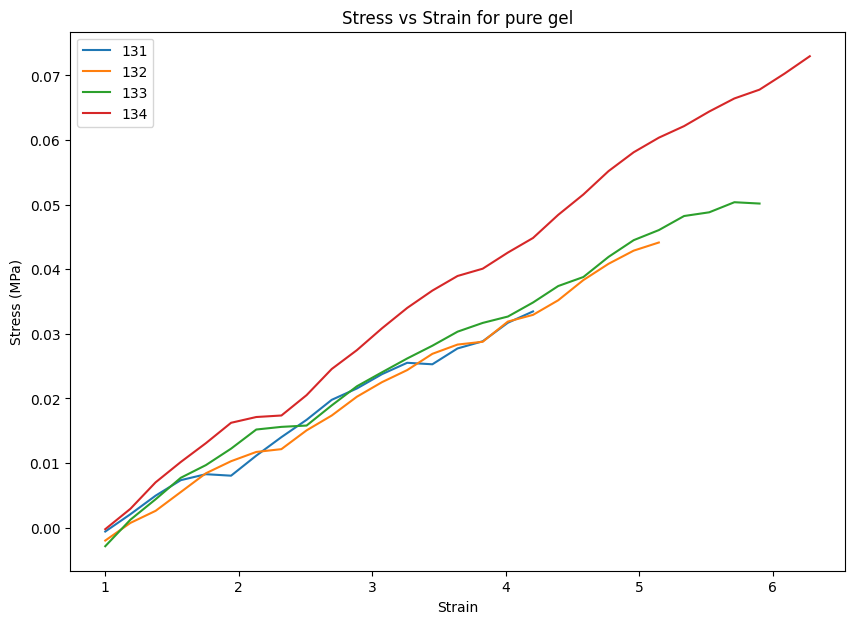

The mean Young's Modulus for material pure gel is 0.010494801404719293 MPa
The standard deviation of Young's Modulus for material pure gel is 0.001257869201202042 MPa
The mean max stress for material pure gel is 0.050955974150430954 MPa
The mean max strain for material pure gel is 5.569872125
The Young's Modulus for sample number 087 is 0.2664468782579025 MPa
The Young's Modulus for sample number 088 is 0.27993481031260126 MPa
The Young's Modulus for sample number 089 is 0.2882437943734083 MPa
The Young's Modulus for sample number 090 is 0.25538822690570506 MPa
The Young's Modulus for sample number 091 is 0.267820878149823 MPa


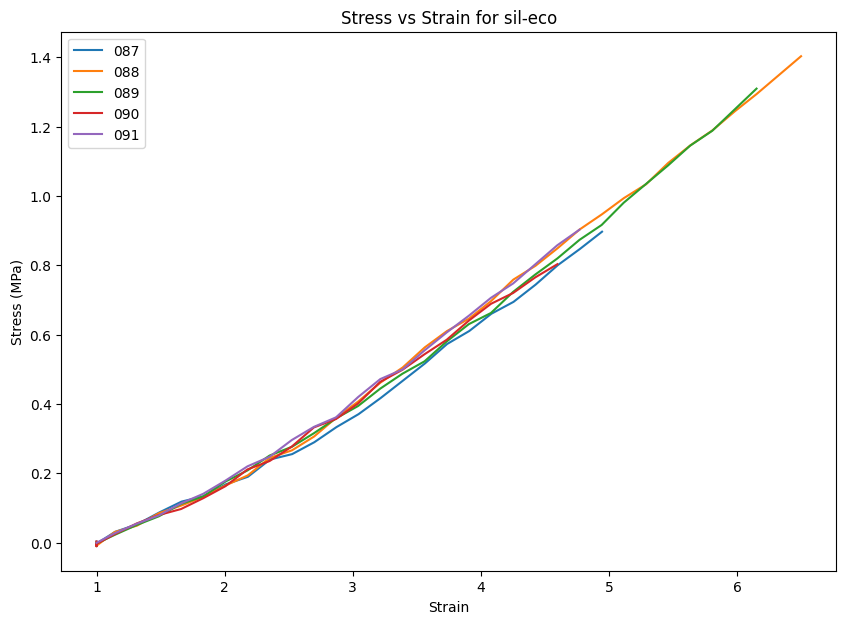

The mean Young's Modulus for material sil-eco is 0.27156691759988805 MPa
The standard deviation of Young's Modulus for material sil-eco is 0.01140296009265686 MPa
The mean max stress for material sil-eco is 1.1068622660514693 MPa
The mean max strain for material sil-eco is 5.564937649999999
The Young's Modulus for sample number 147 is 0.13337233352101657 MPa
The Young's Modulus for sample number 148 is 0.13970864850928755 MPa
The Young's Modulus for sample number 149 is 0.11740495855576714 MPa
The Young's Modulus for sample number 150 is 0.13552666351283874 MPa
The Young's Modulus for sample number 151 is 0.09608376762433084 MPa
The Young's Modulus for sample number 152 is 0.1220929082291601 MPa


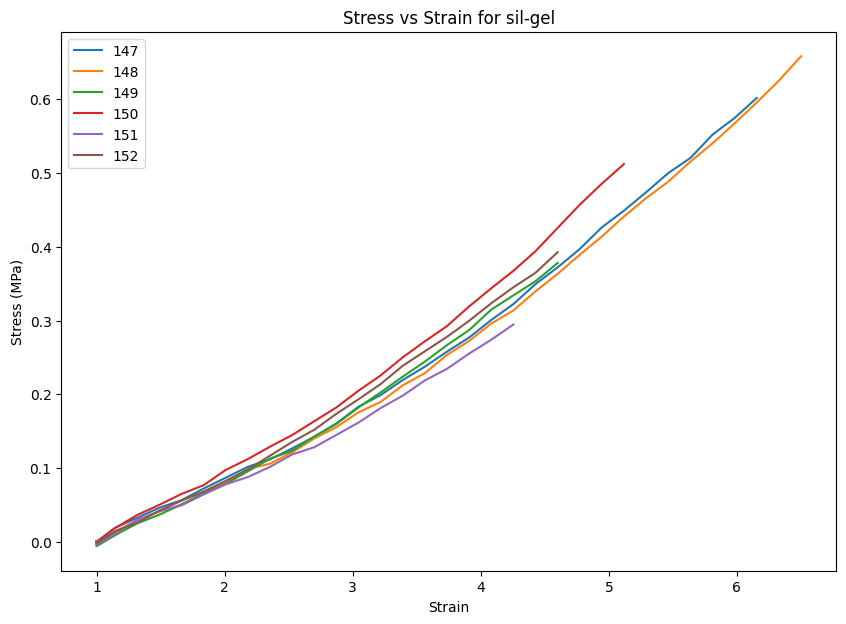

The mean Young's Modulus for material sil-gel is 0.12403154665873349 MPa
The standard deviation of Young's Modulus for material sil-gel is 0.014685071075367496 MPa
The mean max stress for material sil-gel is 0.487266650167484 MPa
The mean max strain for material sil-gel is 5.377845333333333
The Young's Modulus for sample number 164 is 0.13673399954499774 MPa
The Young's Modulus for sample number 165 is 0.14149759682306617 MPa
The Young's Modulus for sample number 166 is 0.13737627321584336 MPa
The Young's Modulus for sample number 167 is 0.15048705404822596 MPa
The Young's Modulus for sample number 168 is 0.13895965022126483 MPa
The Young's Modulus for sample number 169 is 0.13607146045798643 MPa


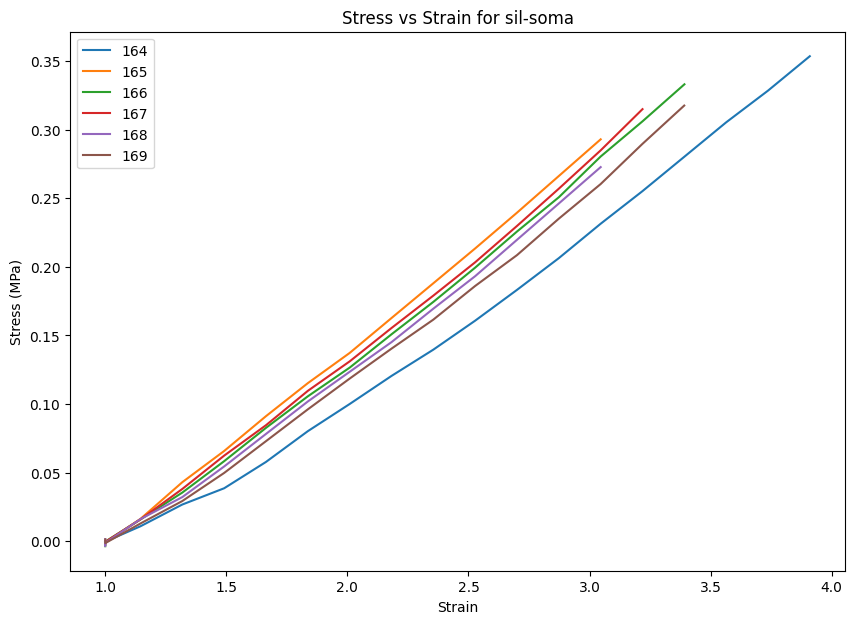

The mean Young's Modulus for material sil-soma is 0.14018767238523075 MPa
The standard deviation of Young's Modulus for material sil-soma is 0.004934170398271216 MPa
The mean max stress for material sil-soma is 0.3381528642106117 MPa
The mean max strain for material sil-soma is 3.5064000000000006
The Young's Modulus for sample number 115 is 0.038052954823433134 MPa
The Young's Modulus for sample number 116 is 0.041936869694189 MPa
The Young's Modulus for sample number 117 is 0.049257590529782146 MPa
The Young's Modulus for sample number 118 is 0.04462033143156407 MPa
The Young's Modulus for sample number 119 is 0.042581392078692895 MPa


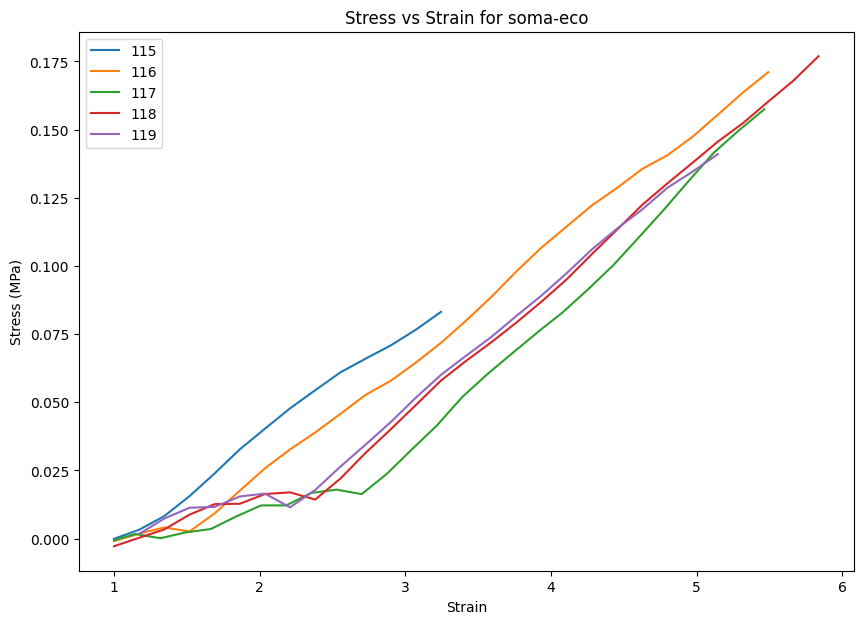

The mean Young's Modulus for material soma-eco is 0.043289827711532246 MPa
The standard deviation of Young's Modulus for material soma-eco is 0.003664468509690918 MPa
The mean max stress for material soma-eco is 0.15182926322798612 MPa
The mean max strain for material soma-eco is 5.20965545
The Young's Modulus for sample number 176 is 0.04577716419936429 MPa
The Young's Modulus for sample number 177 is 0.052198481004994246 MPa
The Young's Modulus for sample number 178 is 0.049297502894991116 MPa
The Young's Modulus for sample number 179 is 0.04498247778534081 MPa
The Young's Modulus for sample number 180 is 0.05017182369247082 MPa
The Young's Modulus for sample number 181 is 0.04998562439938085 MPa


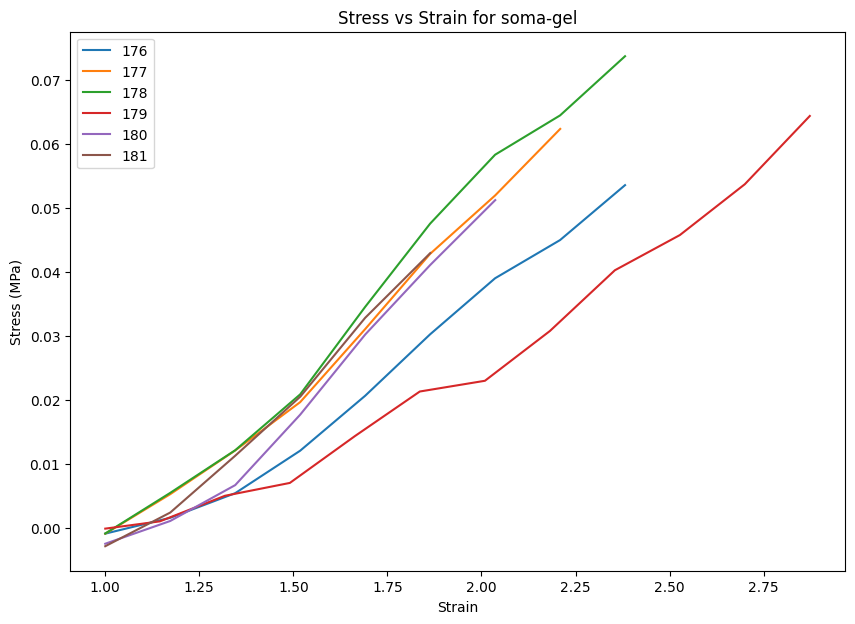

The mean Young's Modulus for material soma-gel is 0.04873551232942369 MPa
The standard deviation of Young's Modulus for material soma-gel is 0.0025420086516554146 MPa
The mean max stress for material soma-gel is 0.06443152962709586 MPa
The mean max strain for material soma-gel is 2.463763708333333
The Young's Modulus for sample number 182 is 0.04767352812043651 MPa
The Young's Modulus for sample number 183 is 0.04756953778548931 MPa
The Young's Modulus for sample number 184 is 0.04305710096073633 MPa
The Young's Modulus for sample number 185 is 0.05519760195944114 MPa
The Young's Modulus for sample number 186 is 0.05936862676391452 MPa


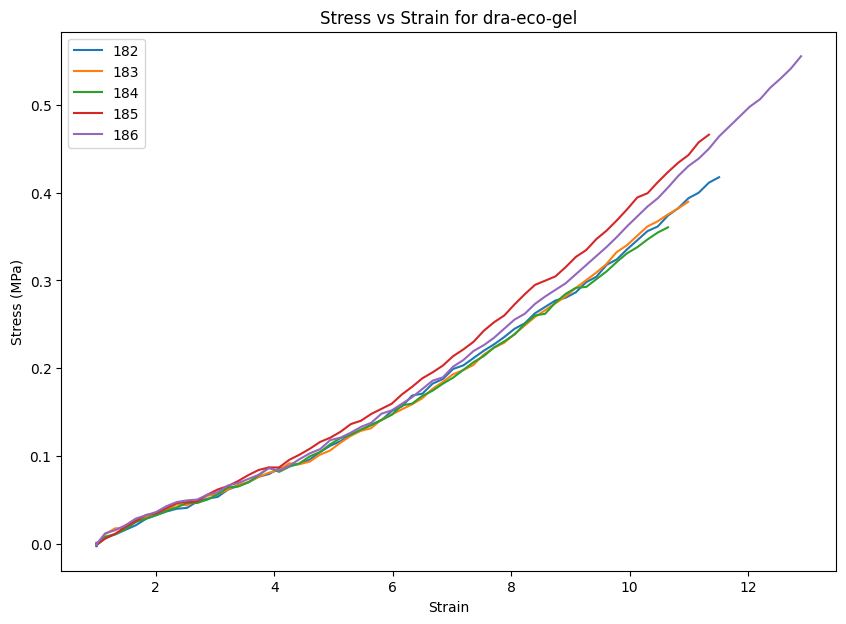

The mean Young's Modulus for material dra-eco-gel is 0.050573279118003564 MPa
The standard deviation of Young's Modulus for material dra-eco-gel is 0.005876503278082969 MPa
The mean max stress for material dra-eco-gel is 0.4432563612546815 MPa
The mean max strain for material dra-eco-gel is 11.648048775000001
The Young's Modulus for sample number 187 is 0.1046547788165906 MPa
The Young's Modulus for sample number 188 is 0.11038002927892447 MPa
The Young's Modulus for sample number 189 is 0.1036183035801828 MPa
The Young's Modulus for sample number 190 is 0.10609751821663989 MPa
The Young's Modulus for sample number 191 is 0.11702682924621972 MPa


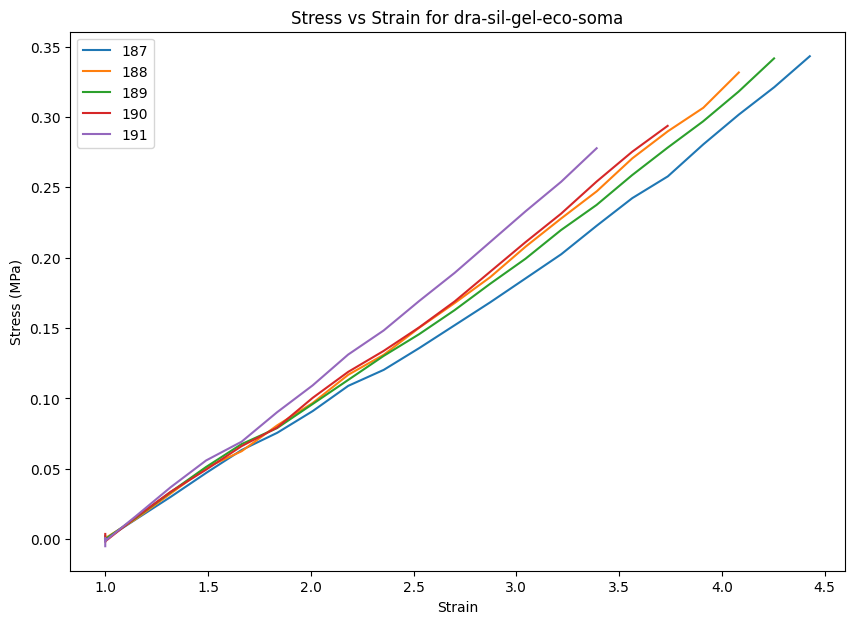

The mean Young's Modulus for material dra-sil-gel-eco-soma is 0.1083554918277115 MPa
The standard deviation of Young's Modulus for material dra-sil-gel-eco-soma is 0.004909694870936158 MPa
The mean max stress for material dra-sil-gel-eco-soma is 0.33229511440299186 MPa
The mean max strain for material dra-sil-gel-eco-soma is 4.15101475
The Young's Modulus for sample number 192 is 0.09083421259474261 MPa
The Young's Modulus for sample number 193 is 0.08897789682536897 MPa
The Young's Modulus for sample number 194 is 0.09782456182251477 MPa
The Young's Modulus for sample number 195 is 0.08527862985933791 MPa
The Young's Modulus for sample number 196 is 0.08268180548114819 MPa


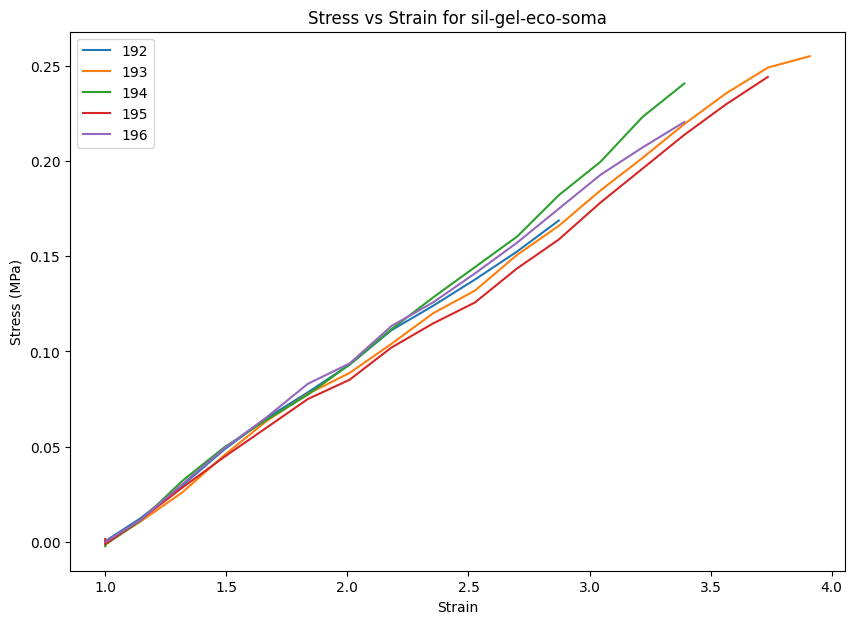

The mean Young's Modulus for material sil-gel-eco-soma is 0.0891194213166225 MPa
The standard deviation of Young's Modulus for material sil-gel-eco-soma is 0.005194893381003455 MPa
The mean max stress for material sil-gel-eco-soma is 0.23821001474207554 MPa
The mean max strain for material sil-gel-eco-soma is 3.6331298499999995
The Young's Modulus for sample number 197 is 0.06107246412844161 MPa
The Young's Modulus for sample number 198 is 0.0721713515269473 MPa
The Young's Modulus for sample number 199 is 0.06711287683519772 MPa
The Young's Modulus for sample number 200 is 0.059803119848376864 MPa
The Young's Modulus for sample number 201 is 0.056960555815744864 MPa


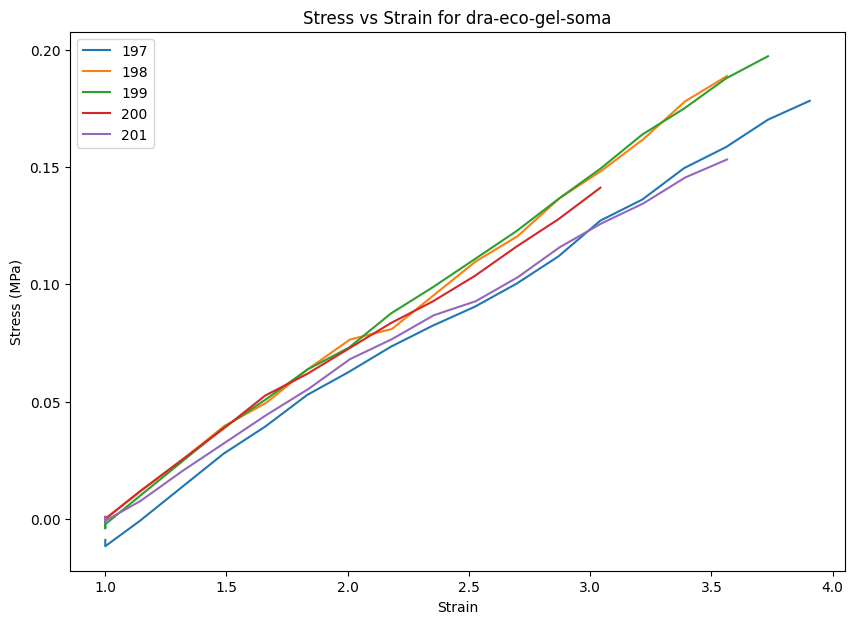

The mean Young's Modulus for material dra-eco-gel-soma is 0.06342407363094169 MPa
The standard deviation of Young's Modulus for material dra-eco-gel-soma is 0.005487086217014707 MPa
The mean max stress for material dra-eco-gel-soma is 0.18010335300950164 MPa
The mean max strain for material dra-eco-gel-soma is 3.7344823999999996
The Young's Modulus for sample number 202 is 0.04818555423963499 MPa
The Young's Modulus for sample number 203 is 0.06155758670941898 MPa
The Young's Modulus for sample number 204 is 0.05235478949338258 MPa
The Young's Modulus for sample number 205 is 0.05918836674835262 MPa
The Young's Modulus for sample number 206 is 0.049176173835462154 MPa


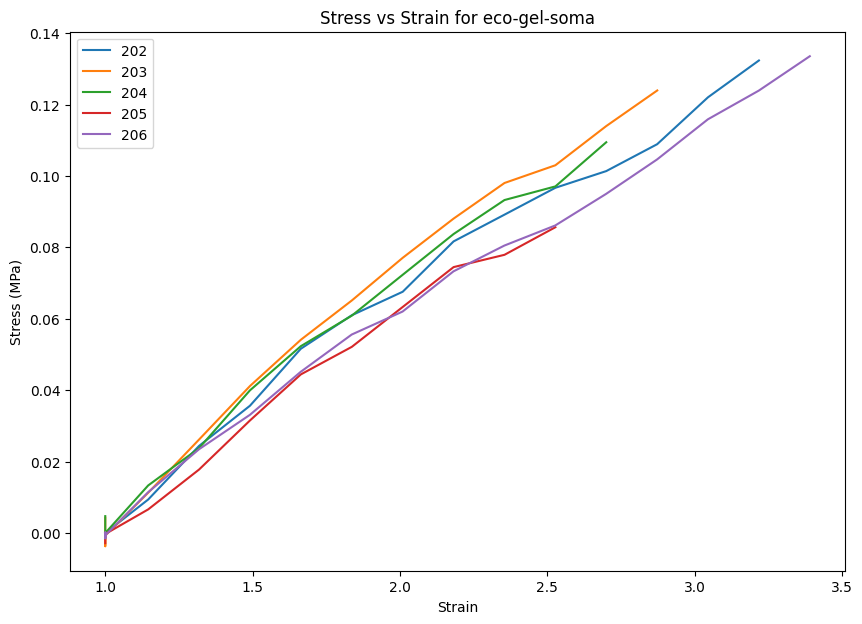

The mean Young's Modulus for material eco-gel-soma is 0.054092494205250266 MPa
The standard deviation of Young's Modulus for material eco-gel-soma is 0.00536241151857565 MPa
The mean max stress for material eco-gel-soma is 0.12485301324657003 MPa
The mean max strain for material eco-gel-soma is 3.1150099750000004
The Young's Modulus for sample number 207 is 0.11358102596235423 MPa
The Young's Modulus for sample number 208 is 0.11510846336964128 MPa
The Young's Modulus for sample number 209 is 0.11403763480304413 MPa
The Young's Modulus for sample number 210 is 0.11286866620417806 MPa
The Young's Modulus for sample number 211 is 0.11533470272367187 MPa


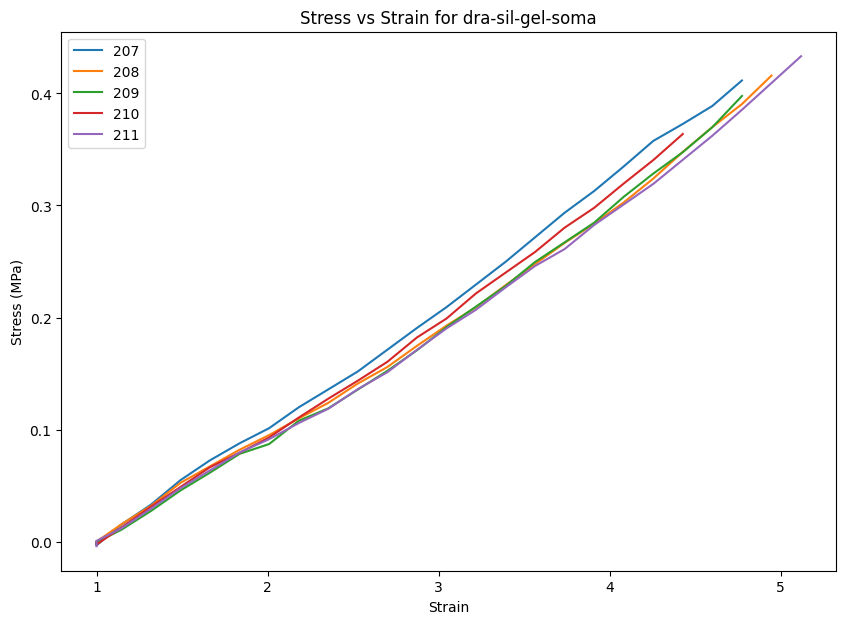

The mean Young's Modulus for material dra-sil-gel-soma is 0.11418609861257792 MPa
The standard deviation of Young's Modulus for material dra-sil-gel-soma is 0.0009266963596115782 MPa
The mean max stress for material dra-sil-gel-soma is 0.4258916803615865 MPa
The mean max strain for material dra-sil-gel-soma is 4.9803981749999995
The Young's Modulus for sample number 212 is 0.1272048290561012 MPa
The Young's Modulus for sample number 213 is 0.12300907810208962 MPa
The Young's Modulus for sample number 214 is 0.11680233694877162 MPa
The Young's Modulus for sample number 215 is 0.11556244951610375 MPa
The Young's Modulus for sample number 216 is 0.12422422065971178 MPa


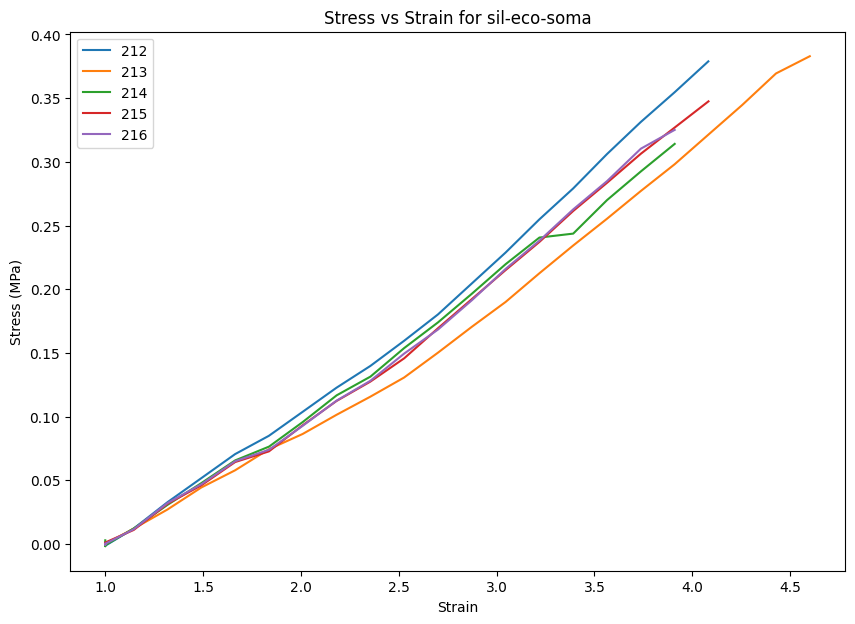

The mean Young's Modulus for material sil-eco-soma is 0.1213605828565556 MPa
The standard deviation of Young's Modulus for material sil-eco-soma is 0.004460249492407466 MPa
The mean max stress for material sil-eco-soma is 0.36825295104555444 MPa
The mean max strain for material sil-eco-soma is 4.28949335
The Young's Modulus for sample number 217 is 0.136929885452922 MPa
The Young's Modulus for sample number 218 is 0.13728011791997674 MPa
The Young's Modulus for sample number 219 is 0.15310794233316213 MPa
The Young's Modulus for sample number 220 is 0.13599003261195974 MPa
The Young's Modulus for sample number 221 is 0.13619633576329127 MPa


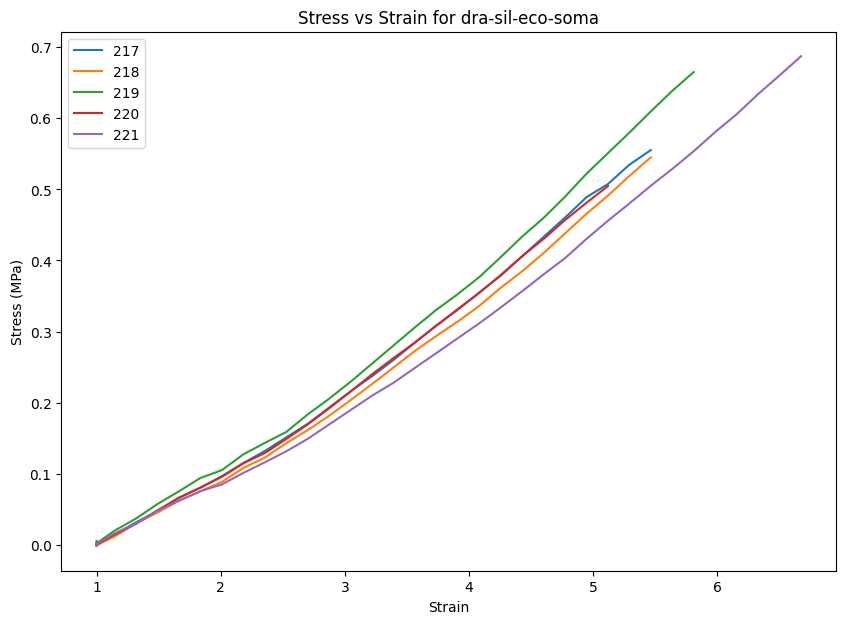

The mean Young's Modulus for material dra-sil-eco-soma is 0.13990086281626238 MPa
The standard deviation of Young's Modulus for material dra-sil-eco-soma is 0.006620273004094043 MPa
The mean max stress for material dra-sil-eco-soma is 0.6115777391994607 MPa
The mean max strain for material dra-sil-eco-soma is 5.8790209
The Young's Modulus for sample number 222 is 0.07032501075543719 MPa
The Young's Modulus for sample number 223 is 0.09701878068162352 MPa
The Young's Modulus for sample number 224 is 0.09160704329768851 MPa
The Young's Modulus for sample number 225 is 0.08042653884271653 MPa
The Young's Modulus for sample number 226 is 0.08233735055699334 MPa


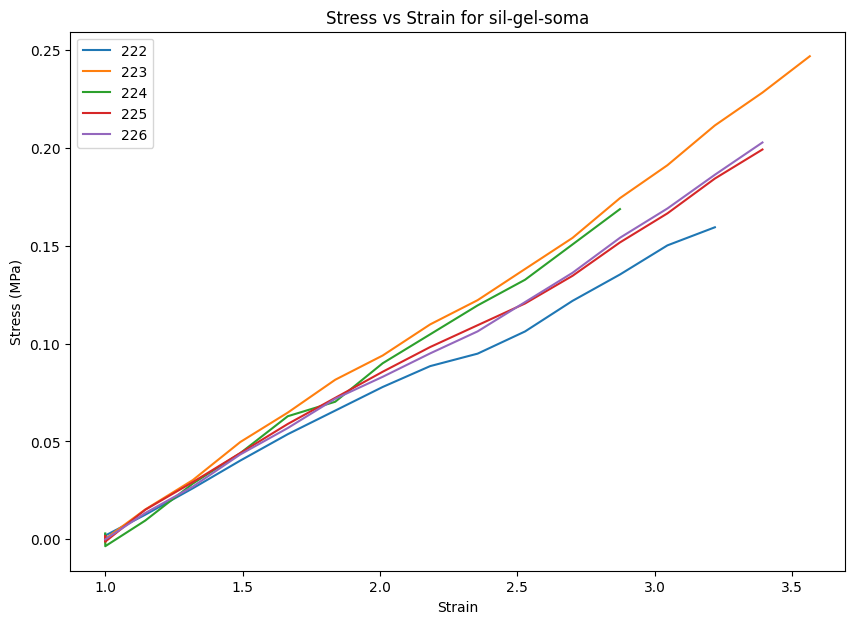

The mean Young's Modulus for material sil-gel-soma is 0.08434294482689182 MPa
The standard deviation of Young's Modulus for material sil-gel-soma is 0.009266143329881259 MPa
The mean max stress for material sil-gel-soma is 0.210711363880811 MPa
The mean max strain for material sil-gel-soma is 3.4605798750000005
The Young's Modulus for sample number 243 is 0.2638815845466937 MPa
The Young's Modulus for sample number 244 is 0.27964577023084664 MPa
The Young's Modulus for sample number 245 is 0.2565325351282747 MPa
The Young's Modulus for sample number 246 is 0.29278443527684245 MPa
The Young's Modulus for sample number 247 is 0.24687743090707973 MPa
The Young's Modulus for sample number 248 is 0.318768088718468 MPa


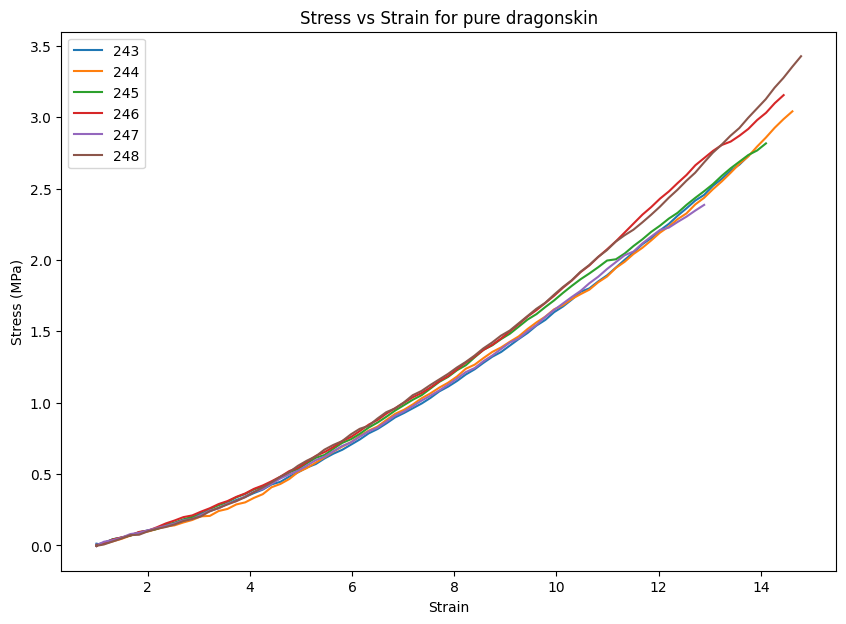

The mean Young's Modulus for material pure dragonskin is 0.2764149741347009 MPa
The standard deviation of Young's Modulus for material pure dragonskin is 0.024142104685166657 MPa
The mean max stress for material pure dragonskin is 2.9787761435985125 MPa
The mean max strain for material pure dragonskin is 14.2731503125
The Young's Modulus for sample number 232 is 0.13629592156185014 MPa
The Young's Modulus for sample number 233 is 0.12431288023413108 MPa
The Young's Modulus for sample number 234 is 0.1259133105120727 MPa
The Young's Modulus for sample number 235 is 0.14646446281218556 MPa
The Young's Modulus for sample number 236 is 0.141544259566042 MPa


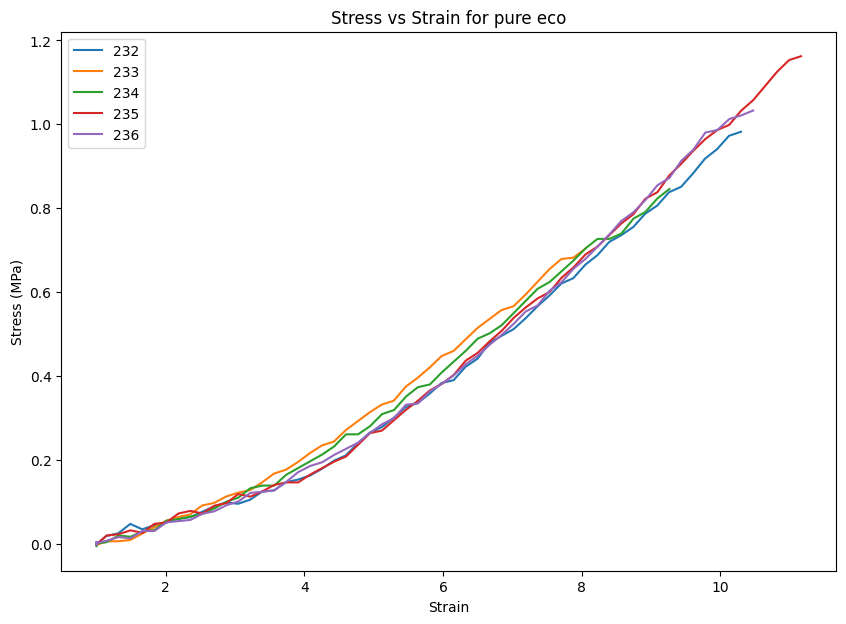

The mean Young's Modulus for material pure eco is 0.13490616693725627 MPa
The standard deviation of Young's Modulus for material pure eco is 0.008633412825249369 MPa
The mean max stress for material pure eco is 0.9645713214853664 MPa
The mean max strain for material pure eco is 10.02319665
The Young's Modulus for sample number 227 is 0.41510390099767197 MPa
The Young's Modulus for sample number 228 is 0.3875225413100679 MPa
The Young's Modulus for sample number 229 is 0.41889520101405414 MPa
The Young's Modulus for sample number 230 is 0.4914596872211269 MPa
The Young's Modulus for sample number 231 is 0.42687725627731343 MPa


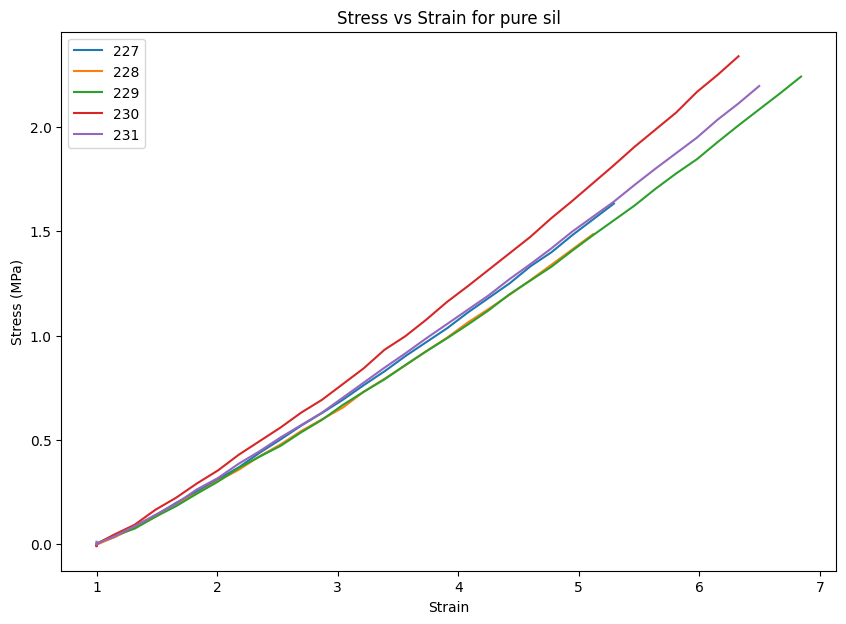

The mean Young's Modulus for material pure sil is 0.4279717173640468 MPa
The standard deviation of Young's Modulus for material pure sil is 0.03439773205366914 MPa
The mean max stress for material pure sil is 2.0616791263336514 MPa
The mean max strain for material pure sil is 6.18809135
The Young's Modulus for sample number 097 is 0.01611274683537667 MPa
The Young's Modulus for sample number 098 is 0.013703455902889124 MPa
The Young's Modulus for sample number 099 is 0.009402713309262522 MPa
The Young's Modulus for sample number 100 is 0.01035985837074969 MPa
The Young's Modulus for sample number 101 is 0.006435713371079605 MPa
The Young's Modulus for sample number 102 is 0.009493674919645603 MPa
The Young's Modulus for sample number 103 is 0.014380911822785229 MPa
The Young's Modulus for sample number 104 is 0.027747720766079596 MPa
The Young's Modulus for sample number 105 is 0.0146604853460164 MPa
The Young's Modulus for sample number 106 is 0.012065930191553755 MPa


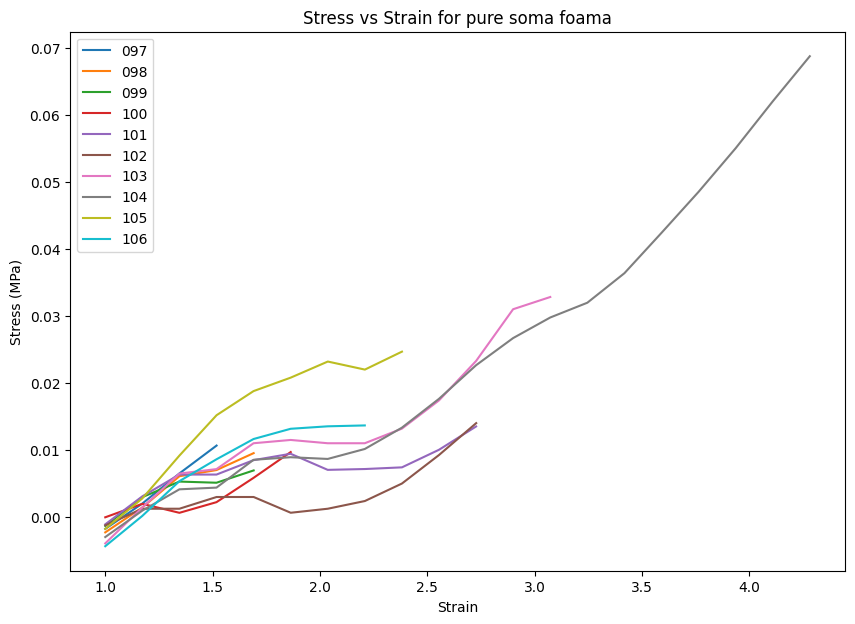

The mean Young's Modulus for material pure soma foama is 0.01343632108354382 MPa
The standard deviation of Young's Modulus for material pure soma foama is 0.005537211927591003 MPa
The mean max stress for material pure soma foama is 0.022186875731781543 MPa
The mean max strain for material pure soma foama is 2.5893317374999993
The Young's Modulus for sample number 076 is 0.35616253104097156 MPa
The Young's Modulus for sample number 077 is 0.2873527492626827 MPa
The Young's Modulus for sample number 078 is 0.36451559687147556 MPa
The Young's Modulus for sample number 079 is 0.32054464182603776 MPa
The Young's Modulus for sample number 080 is 0.3098275259821825 MPa


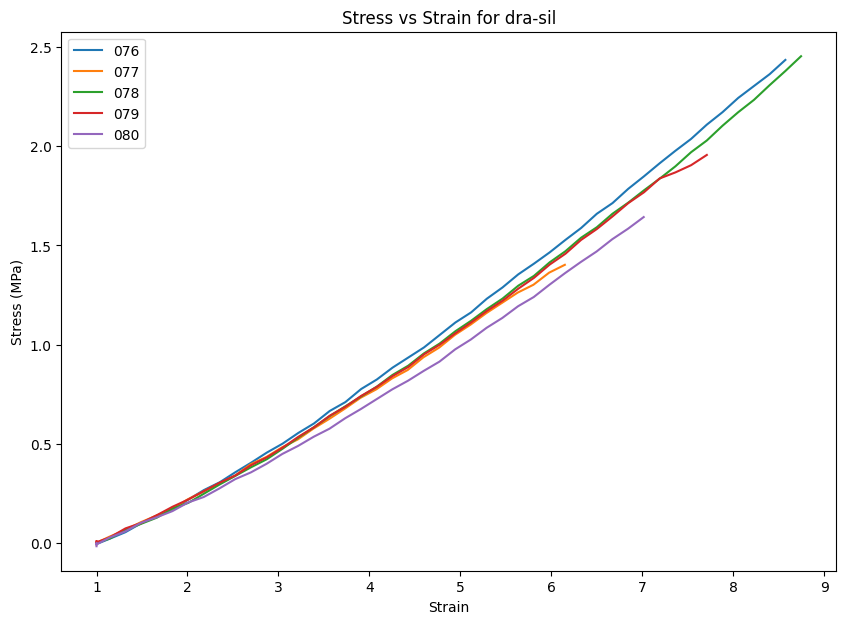

The mean Young's Modulus for material dra-sil is 0.32768060899667006 MPa
The standard deviation of Young's Modulus for material dra-sil is 0.028858368236549407 MPa
The mean max stress for material dra-sil is 2.0269184426772062 MPa
The mean max strain for material dra-sil is 7.811533625
The Young's Modulus for sample number 092 is 0.28943036437859854 MPa
The Young's Modulus for sample number 093 is 0.2686338784980085 MPa
The Young's Modulus for sample number 094 is 0.2782400726902683 MPa
The Young's Modulus for sample number 095 is 0.2342626547165949 MPa
The Young's Modulus for sample number 096 is 0.25864292864468025 MPa


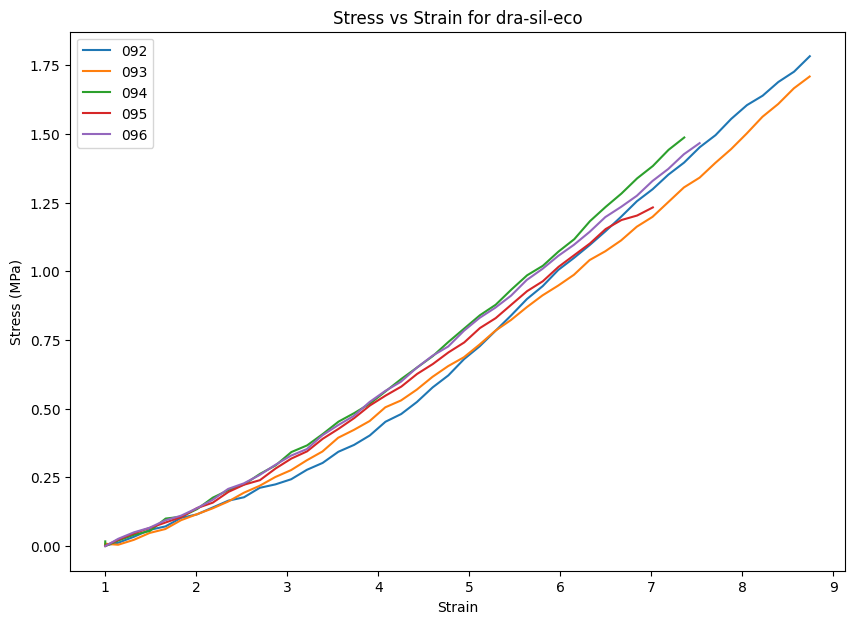

The mean Young's Modulus for material dra-sil-eco is 0.2658419797856301 MPa
The standard deviation of Young's Modulus for material dra-sil-eco is 0.018798932964101005 MPa
The mean max stress for material dra-sil-eco is 1.5801864517861794 MPa
The mean max strain for material dra-sil-eco is 8.053244575
The Young's Modulus for sample number 081 is 0.11158432210610453 MPa
The Young's Modulus for sample number 082 is 0.10646344109273877 MPa
The Young's Modulus for sample number 083 is 0.08912126482714006 MPa
The Young's Modulus for sample number 084 is 0.08427874904746047 MPa
The Young's Modulus for sample number 085 is 0.09808111915665722 MPa


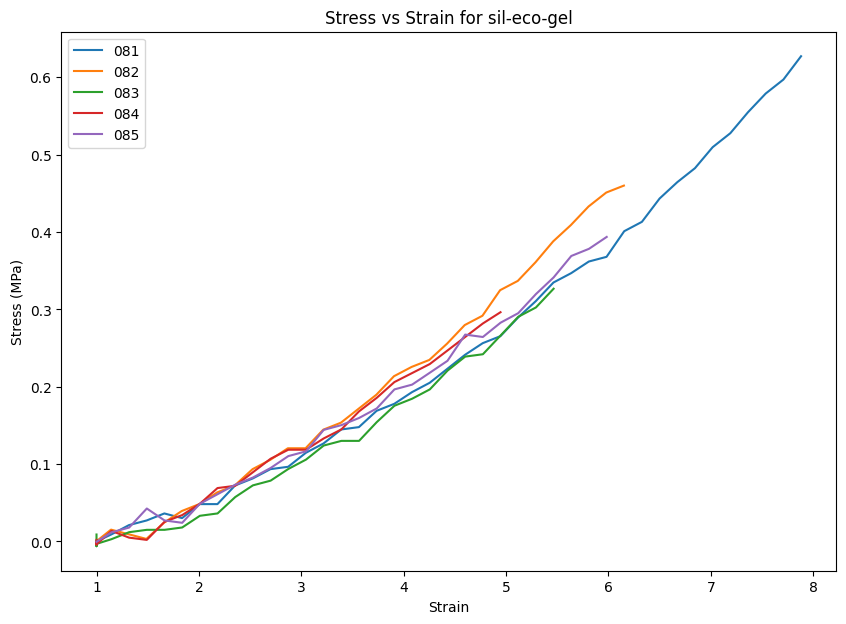

The mean Young's Modulus for material sil-eco-gel is 0.0979057792460202 MPa
The standard deviation of Young's Modulus for material sil-eco-gel is 0.010229667646118136 MPa
The mean max stress for material sil-eco-gel is 0.43837620500599356 MPa
The mean max strain for material sil-eco-gel is 6.2579572500000005


In [21]:
# Call the function with specific material names and the lookup table
dra_sil_eco_gel_data, dra_sil_eco_gel_mean, dra_sil_eco_gel_std = process_and_plot_dataframes('dra-sil-eco-gel', lookup_table, thickness_df)
dra_sil_gel_data, dra_sil_gel_mean, dra_sil_gel_std = process_and_plot_dataframes('dra-sil-gel', lookup_table, thickness_df)
dra_soma_data, dra_soma_mean, dra_soma_std = process_and_plot_dataframes('dra-soma', lookup_table, thickness_df)
dra_eco_data, dra_eco_mean, dra_eco_std = process_and_plot_dataframes('dra-eco', lookup_table, thickness_df)
dragon_gel_data, dragon_gel_mean, dragon_gel_std = process_and_plot_dataframes('dragon-gel', lookup_table, thickness_df)
dragon_soma_sil_data, dragon_soma_sil_mean, dragon_soma_sil_std = process_and_plot_dataframes('dragon-soma-sil', lookup_table, thickness_df)
eco_dra_soma_data, eco_dra_soma_mean, eco_dra_soma_std = process_and_plot_dataframes('eco-dra-soma', lookup_table, thickness_df)
gel_dragon_soma_data, gel_dragon_soma_mean, gel_dragon_soma_std = process_and_plot_dataframes('gel-dragon-soma', lookup_table, thickness_df)
gel_eco_data, gel_eco_mean, gel_eco_std = process_and_plot_dataframes('gel-eco', lookup_table, thickness_df)
pure_gel_data, pure_gel_mean, pure_gel_std = process_and_plot_dataframes('pure gel', lookup_table, thickness_df)
sil_eco_data, sil_eco_mean, sil_eco_std = process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)
sil_gel_data, sil_gel_mean, sil_gel_std = process_and_plot_dataframes('sil-gel', lookup_table, thickness_df)
sil_soma_data, sil_soma_mean, sil_soma_std = process_and_plot_dataframes('sil-soma', lookup_table, thickness_df)
soma_eco_data, soma_eco_mean, soma_eco_std = process_and_plot_dataframes('soma-eco', lookup_table, thickness_df)
soma_gel_data, soma_gel_mean, soma_gel_std = process_and_plot_dataframes('soma-gel', lookup_table, thickness_df)
dra_eco_gel_data, dra_eco_gel_mean, dra_eco_gel_std = process_and_plot_dataframes('dra-eco-gel', lookup_table, thickness_df)
dra_sil_gel_eco_soma_data, dra_sil_gel_eco_soma_mean, dra_sil_gel_eco_soma_std = process_and_plot_dataframes('dra-sil-gel-eco-soma', lookup_table, thickness_df)
sil_gel_eco_soma_data, sil_gel_eco_soma_mean, sil_gel_eco_soma_std = process_and_plot_dataframes('sil-gel-eco-soma', lookup_table, thickness_df)
dra_eco_gel_soma_data, dra_eco_gel_soma_mean, dra_eco_gel_soma_std = process_and_plot_dataframes('dra-eco-gel-soma', lookup_table, thickness_df)
eco_gel_soma_data, eco_gel_soma_mean, eco_gel_soma_std = process_and_plot_dataframes('eco-gel-soma', lookup_table, thickness_df)
dra_sil_gel_soma_data, dra_sil_gel_soma_mean, dra_sil_gel_soma_std = process_and_plot_dataframes('dra-sil-gel-soma', lookup_table, thickness_df)
sil_eco_soma_data, sil_eco_soma_mean, sil_eco_soma_std = process_and_plot_dataframes('sil-eco-soma', lookup_table, thickness_df)
dra_sil_eco_soma_data, dra_sil_eco_soma_mean, dra_sil_eco_soma_std = process_and_plot_dataframes('dra-sil-eco-soma', lookup_table, thickness_df)
sil_gel_soma_data, sil_gel_soma_mean, sil_gel_soma_std = process_and_plot_dataframes('sil-gel-soma', lookup_table, thickness_df)
pure_dragon_data, pure_dragon_mean, pure_dragon_std = process_and_plot_dataframes('pure dragonskin', lookup_table, thickness_df)
pure_eco_data, pure_eco_mean, pure_eco_std = process_and_plot_dataframes('pure eco', lookup_table, thickness_df)
pure_sil_data, pure_sil_mean, pure_sil_std = process_and_plot_dataframes('pure sil', lookup_table, thickness_df)
pure_soma_foama_data, pure_soma_foama_mean, pure_soma_foama_std = process_and_plot_dataframes('pure soma foama', lookup_table, thickness_df)
dra_sil_data, dra_sil_mean, dra_sil_std = process_and_plot_dataframes('dra-sil', lookup_table, thickness_df)
dra_sil_eco_data, dra_sil_eco_mean, dra_sil_eco_std = process_and_plot_dataframes('dra-sil-eco', lookup_table, thickness_df)
sil_eco_gel_data, sil_eco_gel_mean, sil_eco_gel_std = process_and_plot_dataframes('sil-eco-gel', lookup_table, thickness_df)


# process_and_plot_dataframes('sil-eco', lookup_table, thickness_df)

Text(0.5, 1.0, 'Stress')

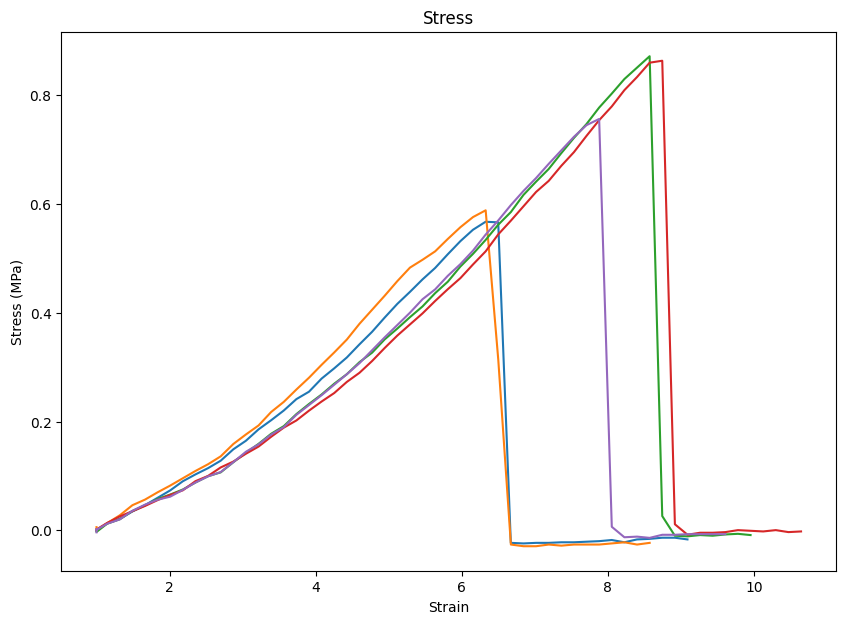

In [22]:
#plot one random sample for all 31 materials to compare stress strain up to the max stress point
fig_force_displacement = plt.figure(figsize=(10, 7))

ax_force_displacement = fig_force_displacement.add_subplot(111)

for sample_number in dra_sil_eco_gel_data.keys():
    stress = dra_sil_eco_gel_data[sample_number]["stress"]
    strain = dra_sil_eco_gel_data[sample_number]["strain"]
    ax_force_displacement.plot(strain, stress, label=sample_number)

ax_force_displacement.set_xlabel('Strain')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title('Stress')

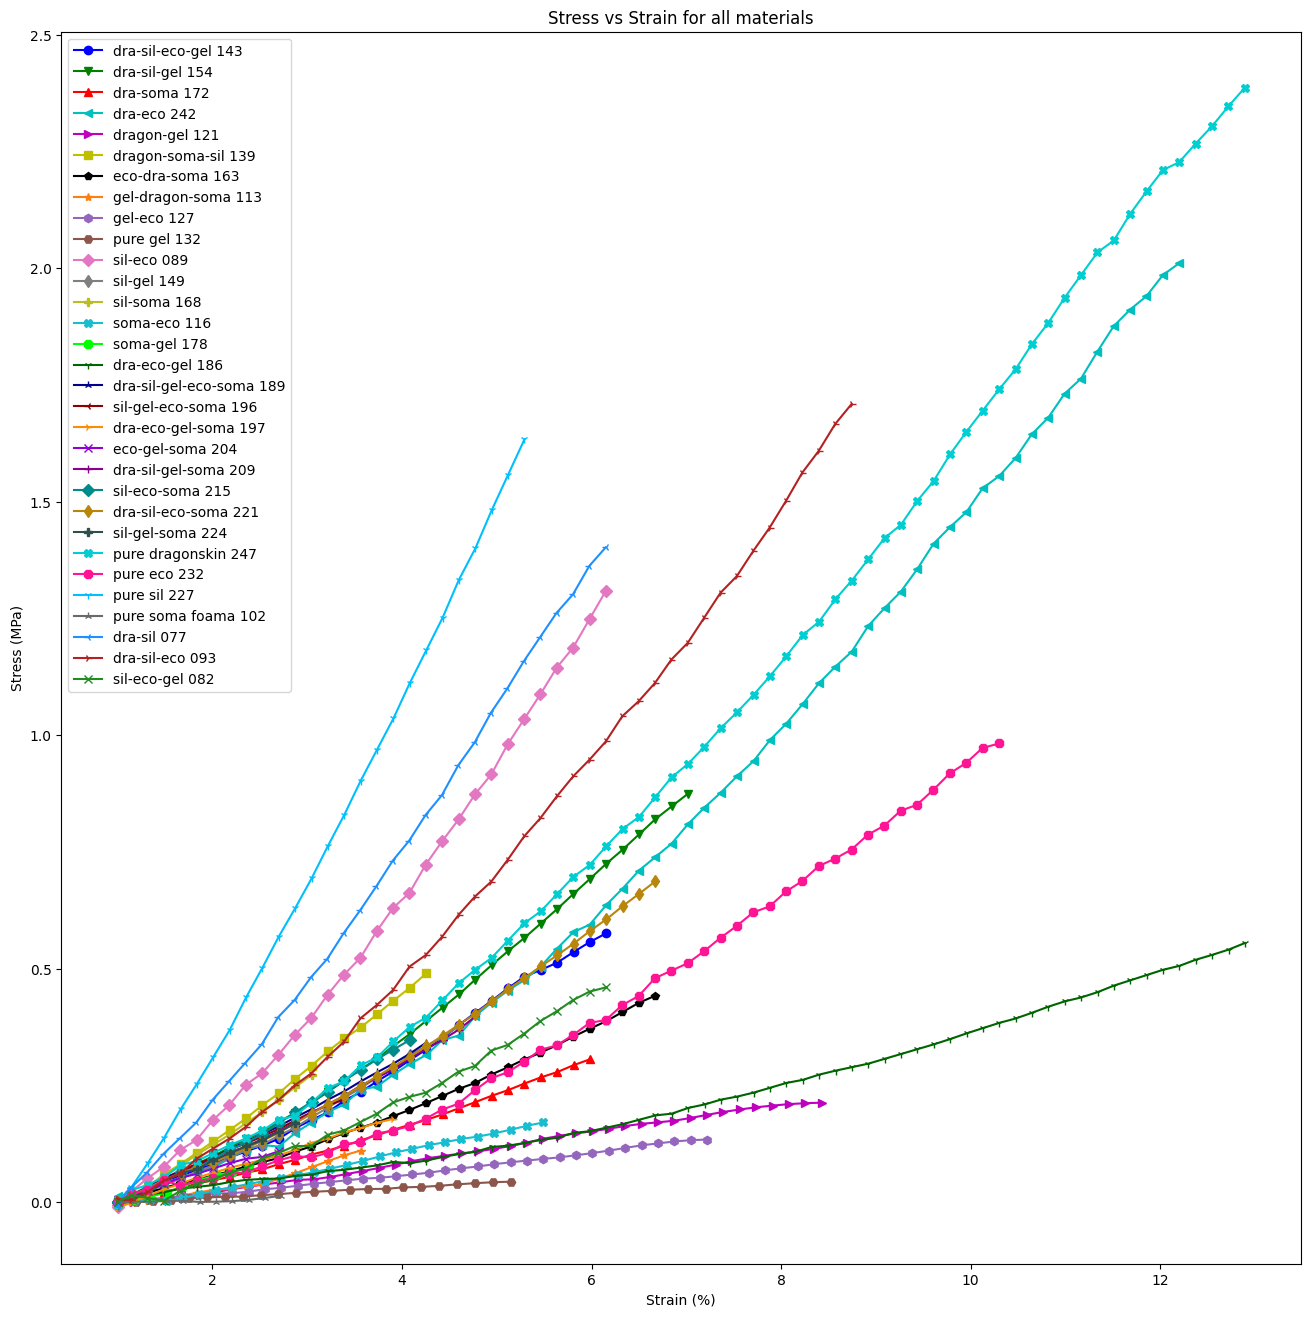

In [23]:
#create markers and colors for all 31 materials, besides white
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'lime', 'darkgreen', 'darkblue', 'darkred', 'darkorange', 'darkviolet', 'darkmagenta', 'darkcyan', 'darkgoldenrod', 'darkslategray', 'darkturquoise', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 'forestgreen']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+', 'D', 'd', 'P', 'X', '8', '1', '2', '3', '4', 'x', '+']

#create dictionary and labels of all 31 materials
dictionaries = [dra_sil_eco_gel_data, dra_sil_gel_data, dra_soma_data, dra_eco_data, dragon_gel_data, dragon_soma_sil_data, eco_dra_soma_data, gel_dragon_soma_data, gel_eco_data, pure_gel_data, sil_eco_data, sil_gel_data, sil_soma_data, soma_eco_data, soma_gel_data, dra_eco_gel_data, dra_sil_gel_eco_soma_data, sil_gel_eco_soma_data, dra_eco_gel_soma_data, eco_gel_soma_data, dra_sil_gel_soma_data, sil_eco_soma_data, dra_sil_eco_soma_data, sil_gel_soma_data, pure_dragon_data, pure_eco_data, pure_sil_data, pure_soma_foama_data, dra_sil_data, dra_sil_eco_data, sil_eco_gel_data]
labels = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

#import random
import random

# Plot a random sample from each material, up to each global maximum stress
fig_force_displacement = plt.figure(figsize=(16, 16))
ax_force_displacement = fig_force_displacement.add_subplot(111)

for data, label, marker, color in zip(dictionaries, labels, markers, colors):
    sample_number = random.choice(list(data.keys()))
    max_stress_index = np.argmax(data[sample_number]['stress'])
    ax_force_displacement.plot(data[sample_number]['strain'][:max_stress_index], data[sample_number]['stress'][:max_stress_index], marker=marker, linestyle='-', color=color, label=f'{label} {sample_number}')

ax_force_displacement.set_xlabel('Strain (%)')
ax_force_displacement.set_ylabel('Stress (MPa)')
ax_force_displacement.set_title(f'Stress vs Strain for all materials')
ax_force_displacement.legend()

plt.show()

#save figure
fig_force_displacement.savefig('stress_strain_all_materials.png', dpi=300)

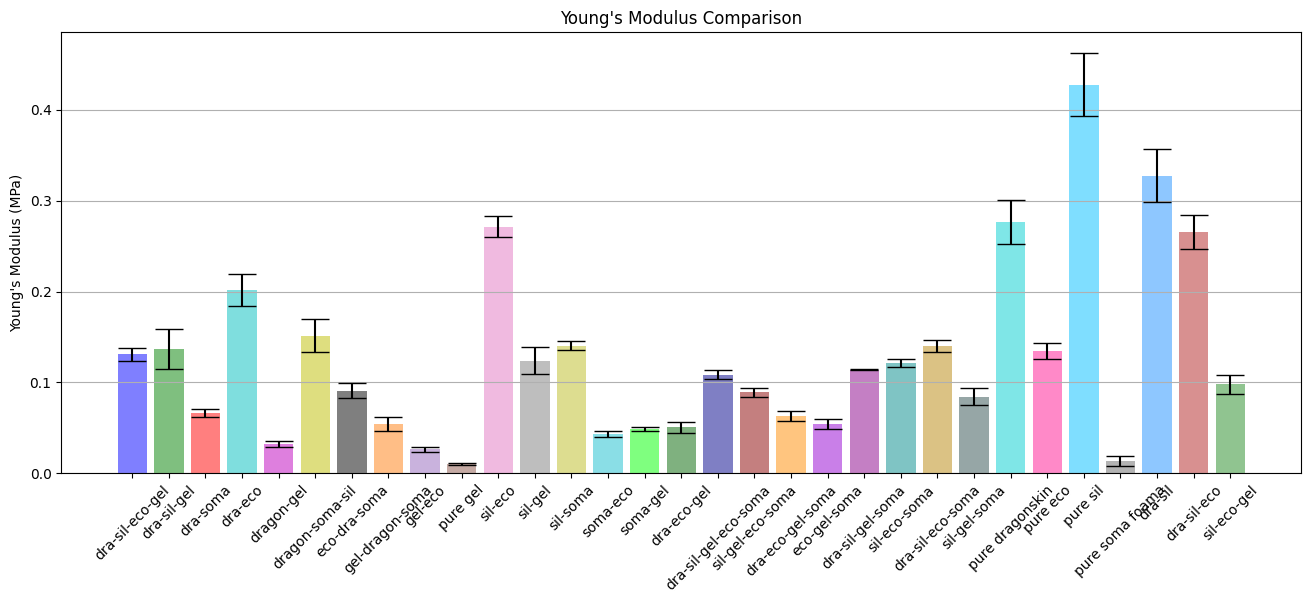

In [24]:
#do the same for all materials, with the bars more spread out
#list all materials
materials = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

x_pos = np.arange(len(materials))
CTEs = [dra_sil_eco_gel_mean, dra_sil_gel_mean, dra_soma_mean, dra_eco_mean, dragon_gel_mean, dragon_soma_sil_mean, eco_dra_soma_mean, gel_dragon_soma_mean, gel_eco_mean, pure_gel_mean, sil_eco_mean, sil_gel_mean, sil_soma_mean, soma_eco_mean, soma_gel_mean, dra_eco_gel_mean, dra_sil_gel_eco_soma_mean, sil_gel_eco_soma_mean, dra_eco_gel_soma_mean, eco_gel_soma_mean, dra_sil_gel_soma_mean, sil_eco_soma_mean, dra_sil_eco_soma_mean, sil_gel_soma_mean, pure_dragon_mean, pure_eco_mean, pure_sil_mean, pure_soma_foama_mean, dra_sil_mean, dra_sil_eco_mean, sil_eco_gel_mean]
error = [dra_sil_eco_gel_std, dra_sil_gel_std, dra_soma_std, dra_eco_std, dragon_gel_std, dragon_soma_sil_std, eco_dra_soma_std, gel_dragon_soma_std, gel_eco_std, pure_gel_std, sil_eco_std, sil_gel_std, sil_soma_std, soma_eco_std, soma_gel_std, dra_eco_gel_std, dra_sil_gel_eco_soma_std, sil_gel_eco_soma_std, dra_eco_gel_soma_std, eco_gel_soma_std, dra_sil_gel_soma_std, sil_eco_soma_std, dra_sil_eco_soma_std, sil_gel_soma_std, pure_dragon_std, pure_eco_std, pure_sil_std, pure_soma_foama_std, dra_sil_std, dra_sil_eco_std, sil_eco_gel_std]


fig, ax = plt.subplots(figsize=(16, 7))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10, color=colors)
ax.set_ylabel("Young's Modulus (MPa)")
ax.set_xticks(x_pos)
ax.set_xticklabels(materials, rotation=45)
ax.set_title("Young's Modulus Comparison")
ax.yaxis.grid(True)

plt.subplots_adjust(bottom=0.25)
fig.savefig('bar_plot_all_materials.png', dpi=300)


# Fractional Factorial Design of Experiments

In [25]:
import pandas as pd
import numpy as np

# Your materials and CTEs
materials = ['dra-sil-eco-gel', 'dra-sil-gel', 'dra-soma', 'dra-eco', 'dragon-gel', 
             'dragon-soma-sil', 'eco-dra-soma', 'gel-dragon-soma', 'gel-eco', 'pure gel', 
             'sil-eco', 'sil-gel', 'sil-soma', 'soma-eco', 'soma-gel', 'dra-eco-gel', 
             'dra-sil-gel-eco-soma', 'sil-gel-eco-soma', 'dra-eco-gel-soma', 'eco-gel-soma', 
             'dra-sil-gel-soma', 'sil-eco-soma', 'dra-sil-eco-soma', 'sil-gel-soma', 
             'pure dragonskin', 'pure eco', 'pure sil', 'pure soma foama', 'dra-sil', 'dra-sil-eco', 'sil-eco-gel']

# Initialize DataFrame and mappings
df = pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E'])
mapping = {'eco': 'A', 'dra': 'B', 'soma': 'C', 'sil': 'D', 'gel': 'E', 'dragon': 'B'}
pure_mapping = {'pure gel': 'E', 'pure dragonskin': 'B', 'pure eco': 'A', 'pure sil': 'D', 'pure soma foama': 'C'}

# Function to map material to binary representation
def material_to_binary(material):
    binary = [0] * 5
    if material in pure_mapping:
        index = df.columns.tolist().index(pure_mapping[material])
        binary[index] = 1
    else:
        components = material.replace('-', ' ').split()
        for comp in components:
            if comp in mapping:
                index = df.columns.tolist().index(mapping[comp])
                binary[index] = 1
    return binary

# Populate DataFrame
for material in materials:
    binary_rep = material_to_binary(material)
    df.loc[len(df)] = binary_rep

# Print DataFrame to confirm
print(df.head())


   A  B  C  D  E
0  1  1  0  1  1
1  0  1  0  1  1
2  0  1  1  0  0
3  1  1  0  0  0
4  0  1  0  0  1


In [26]:
!pip install statsmodels
import statsmodels.api as sm
df['Youngs_Modulus'] = CTEs  # Replace CTEs with your list of Young's moduli values
df['Error'] = error  # Replace error with your list of error terms

# Add a constant term for intercept
X = sm.add_constant(df[['A', 'B', 'C', 'D', 'E']])
y = df['Youngs_Modulus']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     11.28
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           9.05e-06
Time:                        08:23:03   Log-Likelihood:                 46.792
No. Observations:                  31   AIC:                            -81.58
Df Residuals:                      25   BIC:                            -72.98
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1735      0.029      6.063      0.0

In [27]:
from itertools import combinations
import statsmodels.api as sm

# Generate all possible 2-way interaction terms
two_way_interactions = list(combinations(['A', 'B', 'C', 'D', 'E'], 2))

# Add 2-way interaction terms to DataFrame
for term in two_way_interactions:
    interaction_term = ''.join(term)
    df[interaction_term] = df[term[0]] * df[term[1]]

# List of predictors with main effects and 2-way interactions
predictors_two_way = ['A', 'B', 'C', 'D', 'E'] + ["".join(term) for term in two_way_interactions]

# Define predictors and fit the model
X = sm.add_constant(df[predictors_two_way])
y = df['Youngs_Modulus']  # Replace with your actual column name for Young's Modulus

# Fit the model
model_two_way = sm.OLS(y, X).fit()

# Summary statistics for the new model
print(model_two_way.summary())


                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     21.31
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.96e-07
Time:                        08:23:03   Log-Likelihood:                 76.624
No. Observations:                  31   AIC:                            -121.2
Df Residuals:                      15   BIC:                            -98.30
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2258      0.029      7.688      0.0

In [28]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd  # Assume you're using Pandas for your DataFrame

# Generate all possible 3-way interaction terms
three_way_interactions = list(combinations(['A', 'B', 'C', 'D', 'E'], 3))

# Add 3-way interaction terms to DataFrame
for term in three_way_interactions:
    interaction_term = ''.join(term)
    df[interaction_term] = df[term[0]] * df[term[1]] * df[term[2]]

# Combine predictors: main effects, 2-way and 3-way interactions
predictors_three_way = ['A', 'B', 'C', 'D', 'E'] + ["".join(term) for term in two_way_interactions] + ["".join(term) for term in three_way_interactions]

# Define predictors and fit the model
X = sm.add_constant(df[predictors_three_way])
y = df['Youngs_Modulus']  # Assuming this is your column name for Young's Modulus

# Fit the model
model_three_way = sm.OLS(y, X).fit()

# Summary statistics for the new model
print(model_three_way.summary())


                            OLS Regression Results                            
Dep. Variable:         Youngs_Modulus   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     45.44
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           0.000235
Time:                        08:23:03   Log-Likelihood:                 112.66
No. Observations:                  31   AIC:                            -173.3
Df Residuals:                       5   BIC:                            -136.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2548      0.033      7.695      0.0